In [501]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
from arch import arch_model
warnings.filterwarnings("ignore")

In [502]:
evds=evdsAPI('dsIC3fiGlu')


In [503]:
import yfinance as yf 


In [504]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.326300
1,02-02-2006,1.324100
2,03-02-2006,1.327700
3,06-02-2006,1.325700
4,07-02-2006,1.329600
...,...,...
4713,26-02-2024,31.060500
4714,27-02-2024,31.100000
4715,28-02-2024,31.129700
4716,29-02-2024,31.176100


In [505]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()


usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [506]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38


In [507]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [508]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38


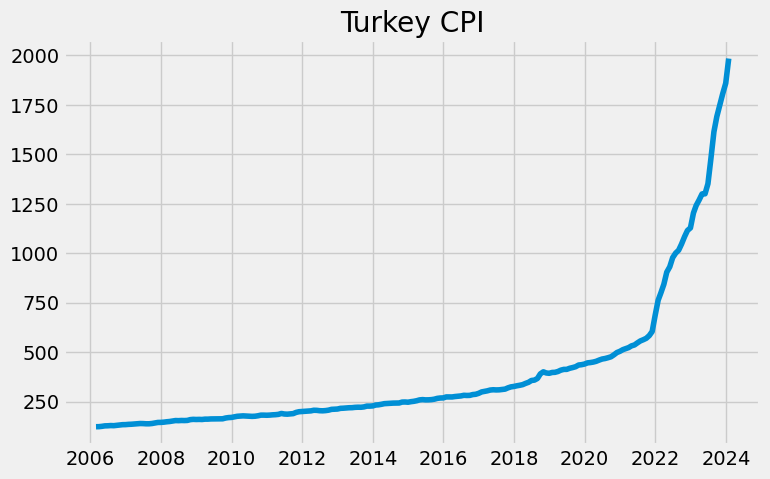

In [509]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [510]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [511]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change(1)*100
money=money.dropna()
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-10-31,3.356297
2023-11-30,2.245991
2023-12-31,4.333376


In [512]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del m3["Tarih"]
m3.columns=["M3 Para Arzi"]
m3=m3/1e+08
m3=m3.set_index(money.index)
m3

,M3 Para Arzi
Tarih,
2006-02-28,2.663248
2006-03-31,2.731552
2006-04-30,2.767716
2006-05-31,3.025340
2006-06-30,3.038097
...,...
2023-10-31,130.934676
2023-11-30,134.161244
2023-12-31,140.183543


In [513]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-08-31,9.1
2023-09-30,9.0
2023-10-31,8.5
2023-11-30,9.0


In [514]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-10-31,88.704091
2023-11-30,82.027727
2023-12-31,77.324000


In [515]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324


In [516]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324


In [517]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
212,2023-10,33.00
213,2023-11,41.09
214,2023-12,42.50
215,2024-1,44.00


In [518]:
dates=pd.date_range('2006-02-28',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-10-31,33.00
2023-11-30,41.09
2023-12-31,42.50


In [519]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-10-31,58.43
2023-11-30,58.61
2023-12-31,58.16
2024-01-31,59.41


In [520]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",periods=len(perakende1),freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-08-31,185.330997,183.564524,176.254302
2023-09-30,184.673020,183.157065,174.785903
2023-10-31,182.582955,180.947621,178.237289
2023-11-30,183.908595,182.048518,178.930674


In [521]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-10-31,38.900000
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000


In [522]:
sanayi=pd.read_excel("./sanayi uretim endeksi ve degisim oranlari (2015=100).xls")
sanayi=pd.DataFrame(sanayi.iloc[8:,5])
sanayi.columns=["Sanayi"]
sanayi=sanayi.set_index(pd.date_range(start="2005-02-08",periods=len(sanayi),freq="1M"))
sanayi=sanayi.dropna()
sanayi=sanayi.astype(float)
sanayi

,Sanayi
2005-02-28,57.747916
2005-03-31,57.058754
2005-04-30,57.685141
2005-05-31,58.226534
2005-06-30,58.022939
...,...
2023-08-31,146.075796
2023-09-30,145.853837
2023-10-31,145.491300
2023-11-30,143.444185


In [523]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="03-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
#mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2024-01-01",freq="1M"))
del mfaiz["YEARWEEK"]
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-03",periods=len(mfaiz),freq="W"))
mfaiz=mfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])

mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.70
2006-03-31,14.84
2006-04-30,14.87
2006-05-31,14.84
2006-06-30,15.57
...,...
2023-10-31,41.72
2023-11-30,46.07
2023-12-31,52.50
2024-01-31,49.61


In [524]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-10-31,5.57
2023-11-30,4.49
2023-12-31,3.36
2024-01-31,3.50


In [525]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-09-30,2.859751e+09
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09


In [526]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-09-30,89.21
2023-10-31,89.10
2023-11-30,87.36
2023-12-31,85.93


In [527]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-09-30,55.53
2023-10-31,56.05
2023-11-30,55.27
2023-12-31,55.29


In [528]:
beklenti=evds.get_data(["TP.BEK.S01.A.U"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del beklenti["Tarih"]
beklenti=beklenti.set_index(pd.date_range(start="2011-03-30",periods=len(beklenti),freq="1M"))
beklenti.columns=["beklenti"]
beklenti=beklenti.dropna()
beklenti

,beklenti
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2023-10-31,4.30
2023-11-30,4.07
2023-12-31,3.26
2024-01-31,5.41


In [536]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
#data["USD/TL2"]=df6["USD/TL"]
#data["USD/TL3"]=df6["USD/TL"]**2
#data["USD/TL4"]=df6["USD/TL"]**3
#data["USD/TL5"]=df6["USD/TL"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["M3"]=m3["M3 Para Arzi"].shift(1)
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data["REDK"]=redk["REDK"].pct_change()*100
data["REDKT"]=redkt["REDKT"].pct_change()*100
data

,USD/TL,Motorin,Perakende Satış,Sanayi,M3,Borç,TÜFE,REDK,REDKT
Tarih,,,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,NaN,2.437308,NaN,1.177123,0.274548,NaN,NaN
2006-04-30,NaN,2.898551,NaN,-0.738864,2.564688,-0.027189,1.336769,NaN,NaN
2006-05-31,2.353679,4.694836,NaN,0.882710,1.323922,0.123397,1.875397,NaN,NaN
2006-06-30,6.483947,5.829596,NaN,0.536906,9.308200,1.649207,0.335413,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-30,2.001541,-3.136247,0.389023,-1.407036,3.374057,3.741984,3.281097,-1.952862,-1.391615
2023-12-31,2.498315,-3.343949,1.735783,2.411073,2.464258,4.034830,2.927207,-1.636905,0.036186
2024-01-31,2.580279,8.319605,0.000000,0.000000,4.488851,3.978186,6.703310,0.698243,3.002351


In [537]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data["Beklenti"]=beklenti["beklenti"]
data=data[['USD/TL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','Beklenti','TÜFE']]
data.iloc[11:23,4]=12.3
data.iloc[23:35,4]=29.32
data.iloc[35:47,4]=7.92
data.iloc[47:59,4]=14.17
data.iloc[59:71,4]=25.45
data.iloc[71:83,4]=15
data.iloc[83:95,4]=8
data.iloc[95:107,4]=846
data.iloc[107:119,4]=949.07
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:,4]=11402.32
#data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.loc["2014-01-31":"2024-01-31"]
#data.iloc[0,4]=14.2
data

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
Tarih,,,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,3.944616,13.80,846.00,3.604096,0.82,3.375162,-0.584687,2.669930,8.85,-3.691204,-5.094658,9.2,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,846.00,-0.850238,0.73,1.804994,0.808574,1.876850,10.75,2.179150,0.919060,9.5,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,846.00,0.128936,0.80,0.451349,0.193691,0.822203,11.65,0.471546,0.641623,9.5,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,846.00,-0.863760,0.73,0.796760,0.478162,-0.154556,10.75,4.682667,5.892031,9.7,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,846.00,-1.367417,0.80,-0.362357,0.091080,0.146305,10.43,1.283880,2.058652,9.7,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,5.071342,4.843457,-0.833114,57.56,11402.32,-0.151948,7.30,4.764088,4.384930,2.048237,42.74,4.522554,5.973282,9.0,31.00,5.14,4.753114
2023-10-31,1.709911,-0.714650,1.974636,58.43,11402.32,-0.248562,5.57,2.694232,3.653039,1.782758,41.72,-0.123305,0.936431,8.5,33.00,4.30,3.433981
2023-11-30,2.001541,-3.136247,0.389023,58.61,11402.32,-1.407036,4.49,3.356297,3.741984,2.499767,46.07,-1.952862,-1.391615,9.0,41.09,4.07,3.281097


In [538]:
data["Zam"]=data["Zam"].pct_change()*100

In [539]:
data.iloc[0,4]=14.2
data.iloc[-1,4]=49.11

In [540]:
data1=data[:-2]

In [541]:
data1=data1.diff()
data1=data1.dropna()

In [550]:
cor_matrix

TÜFE                      1.000000
USD/TL                    0.565407
ParaArzi                  0.525250
Beklenti                  0.512628
Motorin                   0.491960
Zam                       0.382328
Enflasyon Belirsizliği    0.350179
Borç                      0.337236
Kredi                     0.216795
Kredi Faizi               0.100465
Politika Faizi            0.005297
REDKT                    -0.002328
İşsizlik                 -0.025852
Sanayi                   -0.069877
Mevduat Faizi            -0.104367
Perakende Satış          -0.116041
REDK                     -0.117627
Name: TÜFE, dtype: float64

<Axes: title={'center': 'TÜFE ile Korelasyonlar'}>

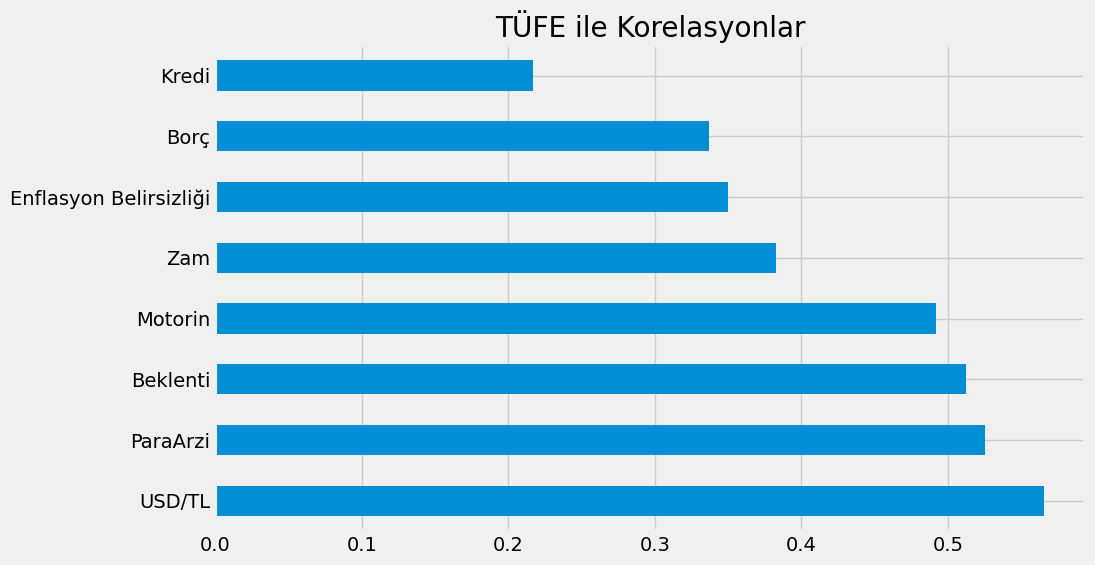

In [554]:
cor_matrix=data1.corr()
cor_matrix=(cor_matrix["TÜFE"]).sort_values(ascending=False)
cor_matrix[1:-8].plot(kind="barh",title="TÜFE ile Korelasyonlar",figsize=(10,6))

In [476]:
data.iloc[-1,4]=49.11

In [477]:
data=data.drop(["Perakende Satış","Kredi Faizi","Sanayi"],axis=1)

In [223]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[-8:,0]},index=pd.date_range(start="2023-08-30",periods=7,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)
faiztahmin.iloc[4:,0]=[42.5,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,35,32.5,30,27.5,25,25,25,25,25]
faiztahmin

,Politika Faizi
2023-08-31,23.50
2023-09-30,31.00
2023-10-31,33.00
2023-11-30,41.09
2023-12-31,42.50
2024-01-31,45.00
2024-02-29,45.00
2024-03-31,45.00
2024-04-30,45.00
2024-05-31,45.00


In [224]:
model=auto_arima(kfaiz["Kredi Faizi"],seasonal=True,X=np.array(pfaiz["Politika Faizi"]).reshape(-1,1),information_criterion="aic",m=9)
model_fit = model.fit(kfaiz["Kredi Faizi"])

forecast = model_fit.predict(25,X=np.array(faiztahmin["Politika Faizi"][7:]).reshape(-1,1))
kfaiztahmin=pd.DataFrame(forecast)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[211:,0]},index=kfaiz.index[211:])
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-09-30,57.560000
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,59.171710
2024-04-30,59.682421
2024-05-31,60.164687
2024-06-30,60.357410


In [225]:
trainexog=kfaiz[47:-2]
trainexog

,Kredi Faizi
2010-01-31,13.76
2010-02-28,13.36
2010-03-31,13.10
2010-04-30,13.18
2010-05-31,13.25
...,...
2023-08-31,45.29
2023-09-30,57.56
2023-10-31,58.43
2023-11-30,58.61


In [226]:
testexog=kfaiztahmin[2:]
testexog

,Kredi Faizi
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,59.171710
2024-04-30,59.682421
2024-05-31,60.164687
2024-06-30,60.357410
2024-07-31,60.235561
2024-08-31,59.956848


In [227]:
faiztahmin[5:]

,Politika Faizi
2024-01-31,45.0
2024-02-29,45.0
2024-03-31,45.0
2024-04-30,45.0
2024-05-31,45.0
2024-06-30,45.0
2024-07-31,45.0
2024-08-31,45.0
2024-09-30,45.0
2024-10-31,42.5


In [228]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[6:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-01-30",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-01-31,49.610000
2024-02-29,51.890000
2024-03-31,54.836019
2024-04-30,52.032172
2024-05-31,52.386891
2024-06-30,54.043113
2024-07-31,52.367740
2024-08-31,52.652536
2024-09-30,53.579405
2024-10-31,52.581444


In [229]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [230]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-10-31,2432.069312
2023-11-30,2316.594077
2023-12-31,2231.258978
2024-01-31,2341.408383


In [231]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [232]:
faiztahmin.columns=["Faiz"]


In [233]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [234]:
exog=pfaiz["Politika Faizi"].iloc[95:-2]
exog=np.array(exog).reshape(-1,1)

In [235]:
exogtest=faiztahmin.iloc[4:]
exogtest=np.array(exogtest).reshape(-1,1)

In [236]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(28,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-01-31,8.716523
2024-02-29,8.924516
2024-03-31,8.923326
2024-04-30,8.951931
2024-05-31,9.068261
2024-06-30,9.116040
2024-07-31,9.170229
2024-08-31,9.248216
2024-09-30,9.303553
2024-10-31,9.358690


In [237]:
from prophet import Prophet


In [238]:
df6.shape

(218, 1)

In [239]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [240]:
"""study.best_params"""

'study.best_params'

In [241]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.966616002895412,changepoint_range=0.9704631745207867,seasonality_prior_scale=6.536685782383086,n_changepoints=78,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:37:58 - cmdstanpy - INFO - Chain [1] start processing


14:37:59 - cmdstanpy - INFO - Chain [1] done processing


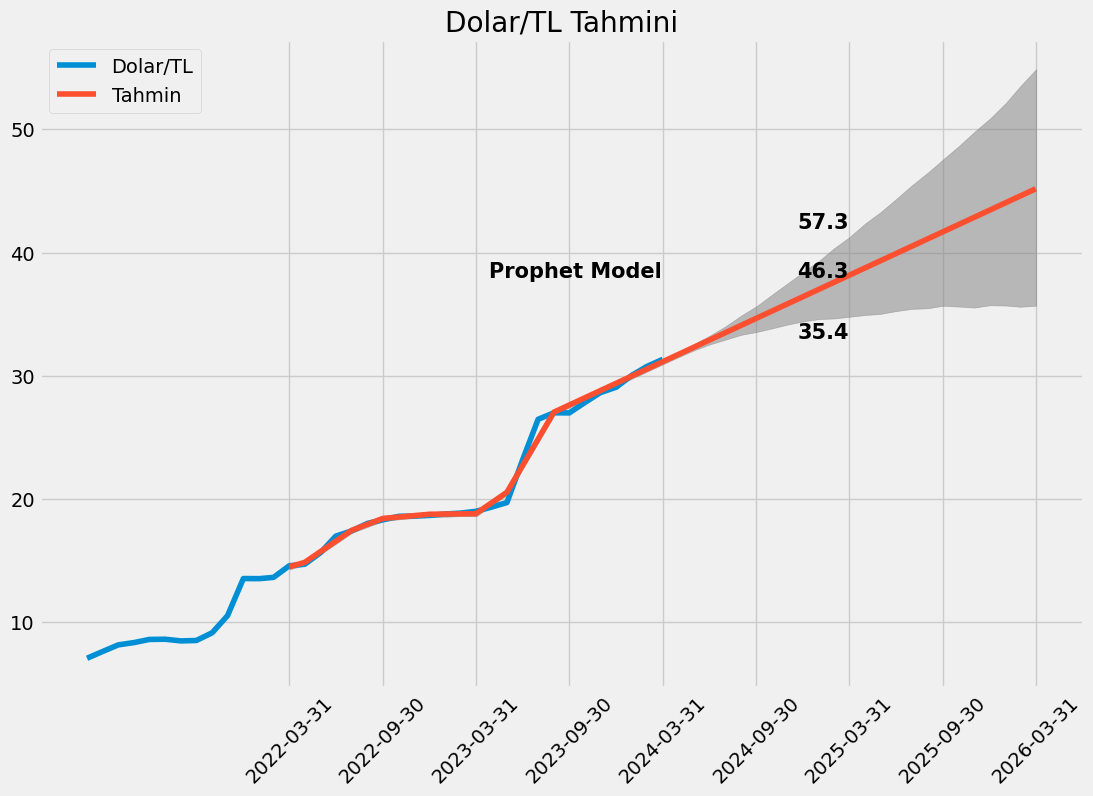

In [242]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [243]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-04-30    1.850283
2024-05-31    1.877225
2024-06-30    1.783195
2024-07-31    1.810353
2024-08-31    1.778162
2024-09-30    1.690737
2024-10-31    1.718048
2024-11-30    1.634545
2024-12-31    1.661865
2025-01-31    1.634699
2025-02-28    1.452754
2025-03-31    1.585375
2025-04-30    1.510290
2025-05-31    1.537413
2025-06-30    1.465292
2025-07-31    1.492269
2025-08-31    1.470328
2025-09-30    1.402280
2025-10-31    1.428984
2025-11-30    1.363405
2025-12-31    1.389902
2026-01-31    1.370848
2026-02-28    1.221441
2026-03-31    1.335992
2026-04-30    1.275850
2026-05-31    1.301770
Name: yhat, dtype: float64

In [244]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-09-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-09-30,27.846114
2023-10-31,28.637082
2023-11-30,29.074857
2023-12-31,30.053750
2024-01-31,30.759448
2024-02-29,31.337000
2024-03-31,31.916823
2024-04-30,32.515974
2024-05-31,33.095797
2024-06-30,33.694947


In [245]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [246]:
"""study.best_params"""

'study.best_params'

In [247]:
sn=pd.DataFrame()
sn["ds"]=df14[50:].index
sn["y"]=df14[50:].values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.441645091305189,changepoint_range=0.9896533088928638,seasonality_prior_scale=6.984796984939141,n_changepoints=96)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:37:59 - cmdstanpy - INFO - Chain [1] start processing


14:38:00 - cmdstanpy - INFO - Chain [1] done processing


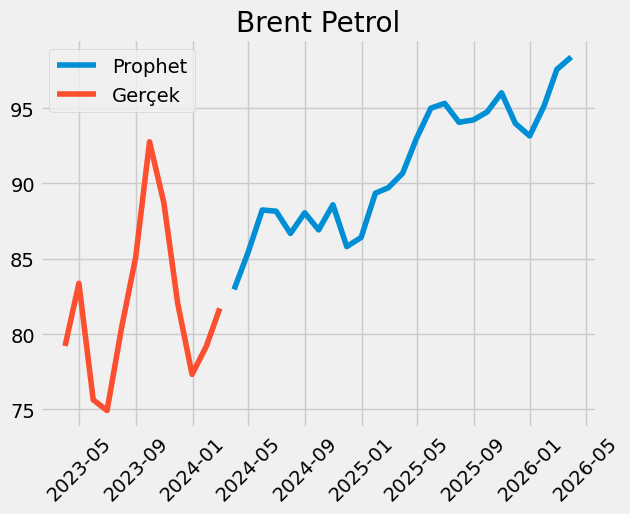

In [248]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-25:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [249]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2023-11-30    84.800272
2023-12-31    77.690244
2024-01-31    77.866339
2024-02-29    81.890407
2024-03-31    82.963097
2024-04-30    85.392174
2024-05-31    88.237388
2024-06-30    88.155605
2024-07-31    86.678420
2024-08-31    88.051728
2024-09-30    86.916884
2024-10-31    88.585129
2024-11-30    85.808730
2024-12-31    86.410430
2025-01-31    89.353784
2025-02-28    89.718214
2025-03-31    90.676272
2025-04-30    92.995213
2025-05-31    94.996096
2025-06-30    95.316601
2025-07-31    94.060820
2025-08-31    94.215898
2025-09-30    94.746162
2025-10-31    96.019107
2025-11-30    93.984128
2025-12-31    93.155834
2026-01-31    95.134401
2026-02-28    97.574045
2026-03-31    98.392222
Name: yhat, dtype: float64

In [250]:
"""brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")
brenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])
del brenttahmin["Unnamed: 0"]
brenttahmin.index.name="" 
brenttahmin"""

'brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")\nbrenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])\ndel brenttahmin["Unnamed: 0"]\nbrenttahmin.index.name="" \nbrenttahmin'

In [252]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=df6.values[89:]

In [253]:
(df6.pct_change()*100)[88:].dropna()

,USD/TL
Tarih,
2013-06-30,3.935544
2013-07-31,1.899464
2013-08-31,1.254202
2013-09-30,3.194974
2013-10-31,-1.331283
...,...
2023-11-30,2.840498
2023-12-31,1.528701
2024-01-31,3.366802


In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(futur

In [ ]:
"""study.best_params"""

'study.best_params'

14:38:57 - cmdstanpy - INFO - Chain [1] start processing
14:38:57 - cmdstanpy - INFO - Chain [1] done processing


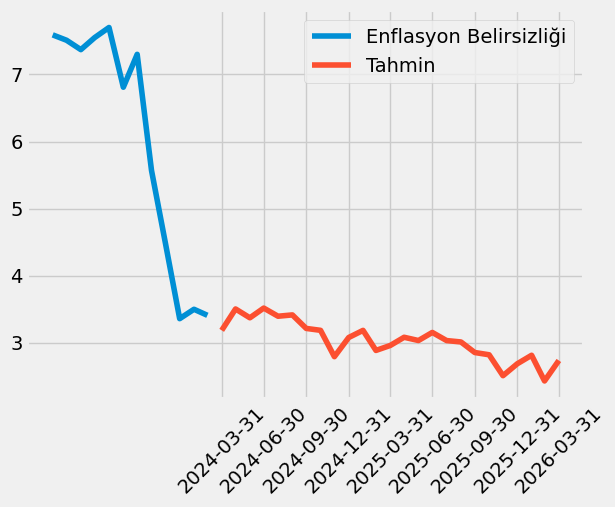

In [255]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=(df6.pct_change()*100)[89:].dropna().values
prophet=Prophet(changepoint_prior_scale=5.942178380780244,changepoint_range=0.9889303340443824,seasonality_prior_scale=4.612794030759727,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(25)],axis=0).values
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [256]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-02-29,3.410000
2024-03-31,3.185794
2024-04-30,3.504568
2024-05-31,3.372782
2024-06-30,3.517948
2024-07-31,3.396365
2024-08-31,3.415980
2024-09-30,3.214621
2024-10-31,3.186206


In [257]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [258]:
#study.best_params

In [259]:
sn=pd.DataFrame()
sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].index
sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].values
sn["cap"]=190
prophet=Prophet(changepoint_prior_scale=3.481321992729419,changepoint_range=0.8995930316928846,growth='linear',seasonality_prior_scale=8.977376335194005,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
future_dates["cap"]=190
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:02 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] done processing


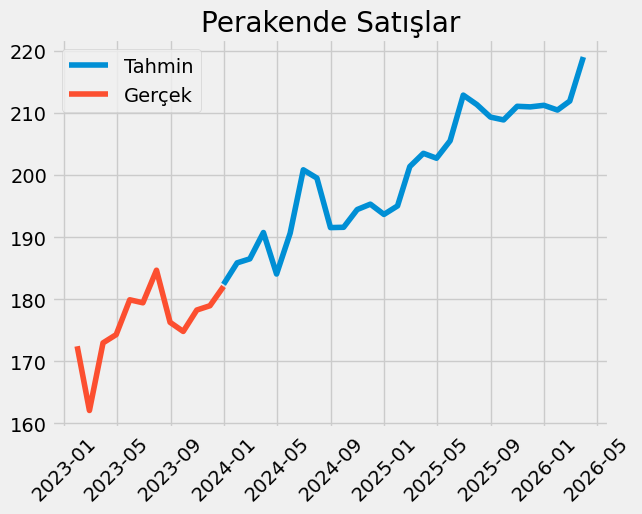

In [260]:
plt.title("Perakende Satışlar")
plt.plot(predictions["yhat"][-28:],label="Tahmin")
plt.plot(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [261]:
perakendetahmin=(predictions["yhat"][-28:].pct_change(periods=1)*100).dropna()
perakendetahmin

ds
2024-01-31    1.899453
2024-02-29    0.347187
2024-03-31    2.275449
2024-04-30   -3.506735
2024-05-31    3.578296
2024-06-30    5.356224
2024-07-31   -0.663651
2024-08-31   -3.999949
2024-09-30    0.025459
2024-10-31    1.493126
2024-11-30    0.446150
2024-12-31   -0.845813
2025-01-31    0.708612
2025-02-28    3.251780
2025-03-31    1.059153
2025-04-30   -0.388384
2025-05-31    1.389245
2025-06-30    3.578033
2025-07-31   -0.716229
2025-08-31   -0.953721
2025-09-30   -0.217622
2025-10-31    1.049791
2025-11-30   -0.043539
2025-12-31    0.119629
2026-01-31   -0.361156
2026-02-28    0.688540
2026-03-31    3.348129
Name: yhat, dtype: float64

In [262]:
((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())

,USD/TL
2023-12-31,3.366802
2024-01-31,2.348118
2024-02-29,1.877642
2024-03-31,1.850283
2024-04-30,1.877225
2024-05-31,1.783195
2024-06-30,1.810353
2024-07-31,1.778162
2024-08-31,1.690737
2024-09-30,1.718048


In [263]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2023-12-31   -8.384441
2024-01-31    0.226664
2024-02-29    5.167918
2024-03-31    1.309908
2024-04-30    2.927900
2024-05-31    3.331938
2024-06-30   -0.092685
2024-07-31   -1.675657
2024-08-31    1.584371
2024-09-30   -1.288838
2024-10-31    1.919357
2024-11-30   -3.134159
2024-12-31    0.701211
2025-01-31    3.406249
2025-02-28    0.407851
2025-03-31    1.067852
2025-04-30    2.557384
2025-05-31    2.151598
2025-06-30    0.337387
2025-07-31   -1.317484
2025-08-31    0.164870
2025-09-30    0.562817
2025-10-31    1.343532
2025-11-30   -2.119347
2025-12-31   -0.881313
2026-01-31    2.123932
2026-02-28    2.564419
2026-03-31    0.838520
Name: yhat, dtype: float64

In [264]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2023-12-30",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2023-12-31,5.678074
2024-01-31,2.580104
2024-02-29,7.142595
2024-03-31,3.184428
2024-04-30,4.860089
2024-05-31,5.174548
2024-06-30,1.715990
2024-07-31,0.072708
2024-08-31,3.301896
2024-09-30,0.407067


In [265]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [266]:
"""study.best_params"""

'study.best_params'

In [267]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=4.9385825316091445,changepoint_range=0.9538315586393957,growth='linear',seasonality_prior_scale=4.314940386271349,n_changepoints=76,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:04 - cmdstanpy - INFO - Chain [1] done processing


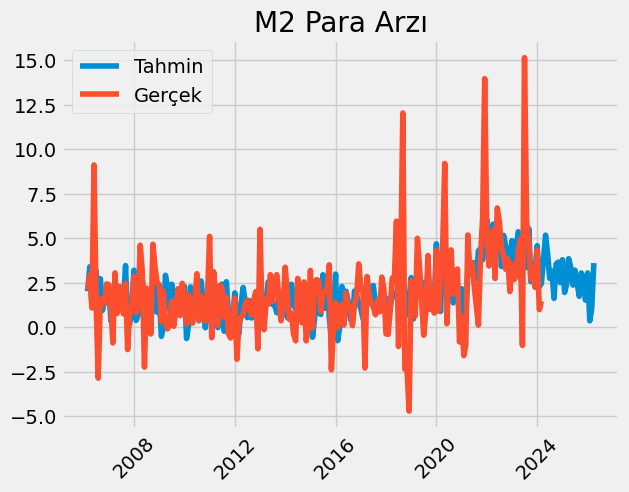

In [268]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [269]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-03-31    3.772215
2024-04-30    5.177126
2024-05-31    4.093669
2024-06-30    2.749236
2024-07-31    3.163442
2024-08-31    1.627241
2024-09-30    3.553357
2024-10-31    3.662121
2024-11-30    2.509463
2024-12-31    3.797269
2025-01-31    1.958455
2025-02-28    2.397339
2025-03-31    3.854469
2025-04-30    3.368618
2025-05-31    2.372900
2025-06-30    3.209932
2025-07-31    2.511289
2025-08-31    1.742606
2025-09-30    3.054071
2025-10-31    2.736171
2025-11-30    1.529528
2025-12-31    3.055196
2026-01-31    0.361698
2026-02-28    1.053939
2026-03-31    3.608748
Name: yhat, dtype: float64

In [270]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2023-11-30,2.245991
2023-12-31,4.333376
2024-01-31,0.993354
2024-02-29,1.467158
2024-03-31,3.772215
2024-04-30,5.177126
2024-05-31,4.093669
2024-06-30,2.749236
2024-07-31,3.163442
2024-08-31,1.627241


In [271]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [272]:
#study.best_params

In [273]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:05 - cmdstanpy - INFO - Chain [1] start processing


14:39:05 - cmdstanpy - INFO - Chain [1] done processing


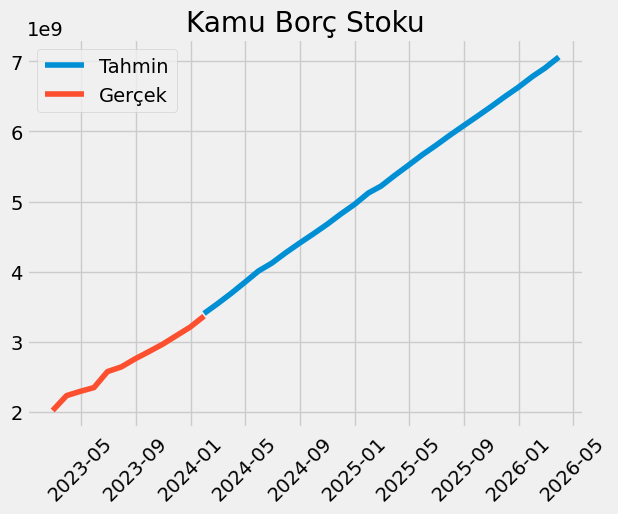

In [274]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [275]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-02-29    3.931115
2024-03-31    4.257236
2024-04-30    4.213795
2024-05-31    4.275757
2024-06-30    2.843438
2024-07-31    3.593886
2024-08-31    3.232160
2024-09-30    2.921967
2024-10-31    3.036143
2024-11-30    3.089515
2024-12-31    2.899262
2025-01-31    3.283513
2025-02-28    1.914112
2025-03-31    2.957358
2025-04-30    2.646211
2025-05-31    2.720277
2025-06-30    2.347082
2025-07-31    2.488168
2025-08-31    2.317654
2025-09-30    2.172175
2025-10-31    2.228737
2025-11-30    2.207552
2025-12-31    2.114284
2026-01-31    2.294370
2026-02-28    1.777334
2026-03-31    2.284275
Name: yhat, dtype: float64

In [276]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09
2024-02-29,3.498790e+09
2024-03-31,3.647741e+09
2024-04-30,3.801450e+09
2024-05-31,3.963991e+09
2024-06-30,4.076704e+09
2024-07-31,4.223216e+09


In [277]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 15),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,15),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 15),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,15),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growt

In [278]:
"""study.best_params"""

'study.best_params'

In [279]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=14.571144908454663,changepoint_range=0.8904873855141803,growth="linear",seasonality_prior_scale=1.5574317873100854,n_changepoints=192,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:06 - cmdstanpy - INFO - Chain [1] start processing


14:39:06 - cmdstanpy - INFO - Chain [1] done processing


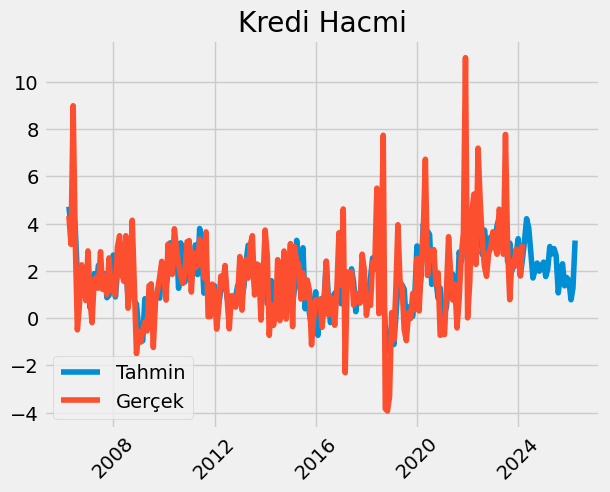

In [280]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [281]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-03-31    3.274719
2024-04-30    4.211402
2024-05-31    3.822762
2024-06-30    2.779446
2024-07-31    1.702339
2024-08-31    2.052646
2024-09-30    2.334258
2024-10-31    1.989962
2024-11-30    2.194548
2024-12-31    2.372778
2025-01-31    1.762977
2025-02-28    2.070257
2025-03-31    3.034666
2025-04-30    2.720901
2025-05-31    2.943499
2025-06-30    2.656843
2025-07-31    1.071377
2025-08-31    1.801217
2025-09-30    2.304988
2025-10-31    1.369638
2025-11-30    1.720901
2025-12-31    1.596658
2026-01-31    0.778968
2026-02-28    1.280263
2026-03-31    3.289407
Name: yhat, dtype: float64

In [282]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2023-11-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,3.274719
2024-04-30,4.211402
2024-05-31,3.822762
2024-06-30,2.779446
2024-07-31,1.702339
2024-08-31,2.052646


In [283]:
'''def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,200),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index
    sn["y"]=m3["M3 Para Arzi"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,200),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index\n    sn["y"]=m3["M3 Para Arzi"][

In [284]:
#study.best_params

In [285]:
sn=pd.DataFrame()
sn["ds"]=m3["M3 Para Arzi"][151:].index
sn["y"]=m3["M3 Para Arzi"][151:].values
sn["cap"]=386.728728252815
prophet=Prophet(changepoint_prior_scale=1.0239522189165728,changepoint_range=0.8631788185438879,growth='logistic',seasonality_prior_scale=8.271825948806738,n_changepoints=14,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["cap"]=386.728728252815
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:07 - cmdstanpy - INFO - Chain [1] start processing


14:39:08 - cmdstanpy - INFO - Chain [1] done processing


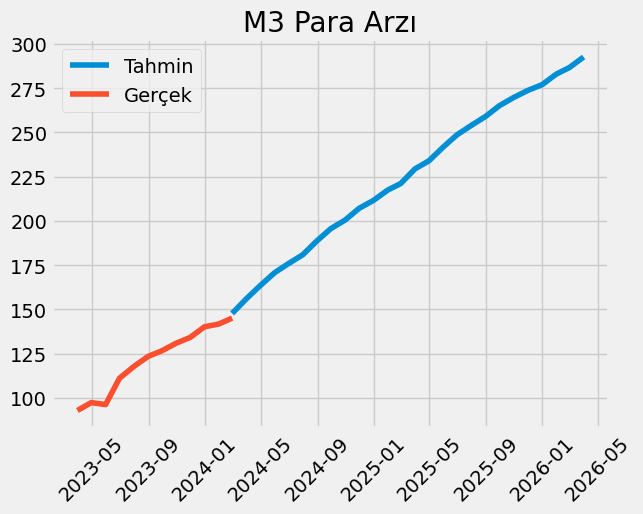

In [286]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"][-26:],label="Tahmin")
plt.plot(m3["M3 Para Arzi"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [287]:
m3tahmin=(predictions["yhat"].tail(26).pct_change(periods=1)*100).dropna()
m3tahmin1 = []
result = m3.iloc[-1,0]
for i in range(len(m3tahmin)):
    result *= (1 + m3tahmin[i] / 100)
    m3tahmin1.append(result)

m3tahmin1 = np.array(m3tahmin1).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2023-10-31,NaN
2023-11-30,134.161244
2023-12-31,140.183543
2024-01-31,141.754955
2024-02-29,153.292857
2024-03-31,160.575563
2024-04-30,167.713750
2024-05-31,172.752929
2024-06-30,177.675341
2024-07-31,185.460954


In [288]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [289]:
#study.best_params

In [290]:
sn=pd.DataFrame()
sn["ds"]=sanayi["Sanayi"].index
sn["y"]=sanayi["Sanayi"].values
prophet=Prophet(changepoint_prior_scale=9.619978429571834,changepoint_range=0.8872026398316396,growth='linear',seasonality_prior_scale=4.66384076344283,n_changepoints=25,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:09 - cmdstanpy - INFO - Chain [1] start processing
14:39:09 - cmdstanpy - INFO - Chain [1] done processing


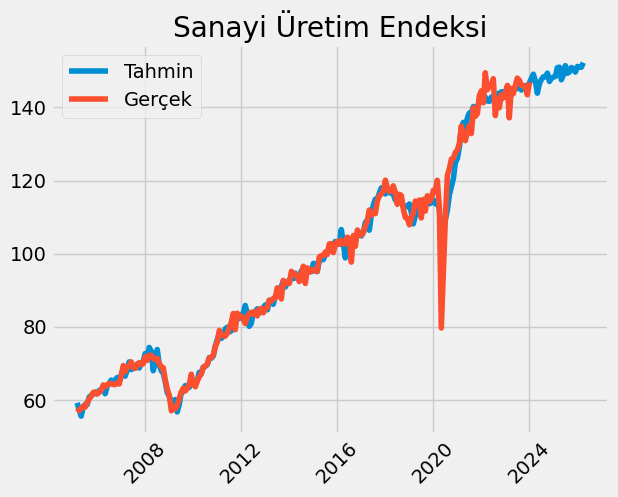

In [291]:
plt.title("Sanayi Üretim Endeksi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(sanayi["Sanayi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [292]:
sanayitahmin=(predictions["yhat"].tail(28).pct_change(periods=1)*100).dropna()
sanayitahmin1 = []
result = sanayi.iloc[-1,0]
for i in range(len(sanayitahmin)):
    result *= (1 + sanayitahmin[i] / 100)
    sanayitahmin1.append(result)

sanayitahmin1 = np.array(sanayitahmin1).reshape(-1, 1)
sanayitahmin1 = pd.DataFrame(sanayitahmin1)
sanayitahmin1.columns = ["Sanayi"]
sanayitahmin1 = sanayitahmin1.set_index(pd.date_range(start="2024-01-31", periods=len(sanayitahmin1), freq="1M"))
#row=pd.DataFrame({"Sanayi":df3.iloc[-2:,0]},index=pd.date_range(start="2023-10-30",periods=2,freq="1M"))
#sanayitahmin1=pd.concat([row,sanayitahmin1],axis=0)
sanayitahmin1

,Sanayi
2024-01-31,148.172656
2024-02-29,149.304582
2024-03-31,147.440413
2024-04-30,144.090834
2024-05-31,146.699778
2024-06-30,147.812608
2024-07-31,148.585767
2024-08-31,148.601460
2024-09-30,149.580131
2024-10-31,147.325270


In [293]:
redkt=redkt.pct_change()*100
redk=redk.pct_change()*100
redkt=redkt.dropna()
redk=redk.dropna()

In [294]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [295]:
#study.best_params

In [296]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].iloc[93:].index
sn["y"]=redkt["REDKT"].iloc[93:].values
prophet=Prophet(changepoint_prior_scale=9.989231798653107,
 changepoint_range=0.960887868185737,
 growth='linear',seasonality_prior_scale=2.612910619508741,n_changepoints=50,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:10 - cmdstanpy - INFO - Chain [1] start processing
14:39:14 - cmdstanpy - INFO - Chain [1] done processing


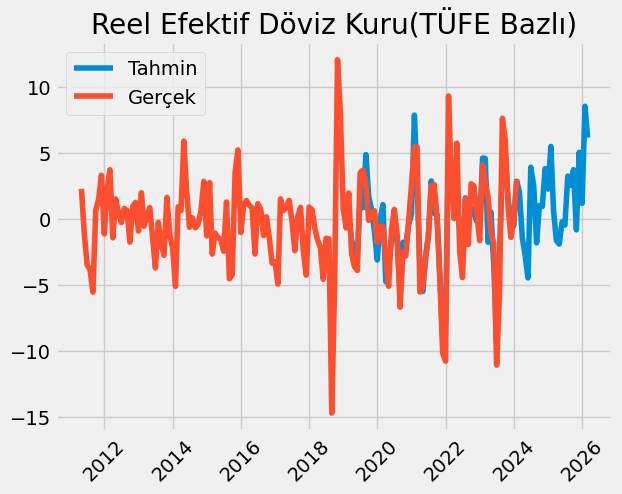

In [297]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [298]:
predictions["yhat"].tail(25)

ds
2024-02-29    2.058887
2024-03-31   -1.405918
2024-04-30   -2.741350
2024-05-31   -4.456059
2024-06-30    3.920602
2024-07-31    2.525882
2024-08-31   -1.805078
2024-09-30    1.024035
2024-10-31    0.950973
2024-11-30    3.808537
2024-12-31    2.264214
2025-01-31    5.489700
2025-02-28    0.659339
2025-03-31   -1.630437
2025-04-30   -1.897415
2025-05-31   -0.210565
2025-06-30   -0.451161
2025-07-31    3.247641
2025-08-31    2.544710
2025-09-30    3.733734
2025-10-31   -0.814407
2025-11-30    5.045467
2025-12-31    1.181693
2026-01-31    8.529885
2026-02-28    6.155997
Name: yhat, dtype: float64

In [299]:
redkttahmin=predictions["yhat"].tail(25).values
redkttahmin1 = []
result = redkt.iloc[-1,0]
for i in range(len(redkttahmin)):
    result *= (1 + redkttahmin[i] / 100)
    redkttahmin1.append(result)

redkttahmin1 = np.array(redkttahmin1).reshape(-1, 1)
redkttahmin1 = pd.DataFrame(redkttahmin1)
redkttahmin1.columns = ["REDKT"]
redkttahmin1 = redkttahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(redkttahmin1), freq="1M"))
redkttahmin1

,REDKT
2024-02-29,3.064166
2024-03-31,3.021087
2024-04-30,2.938268
2024-05-31,2.807337
2024-06-30,2.917402
2024-07-31,2.991092
2024-08-31,2.937100
2024-09-30,2.967177
2024-10-31,2.995394
2024-11-30,3.109475


In [300]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=26,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].iloc[:-26])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redk["REDK"].index\n    sn["y"]=redk["REDK"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_

In [301]:
#study.best_params

In [302]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=9.940418274244966,changepoint_range=0.9610240851805488,growth='linear',seasonality_prior_scale=7.183346343813709,n_changepoints=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:39:15 - cmdstanpy - INFO - Chain [1] start processing


14:39:15 - cmdstanpy - INFO - Chain [1] done processing


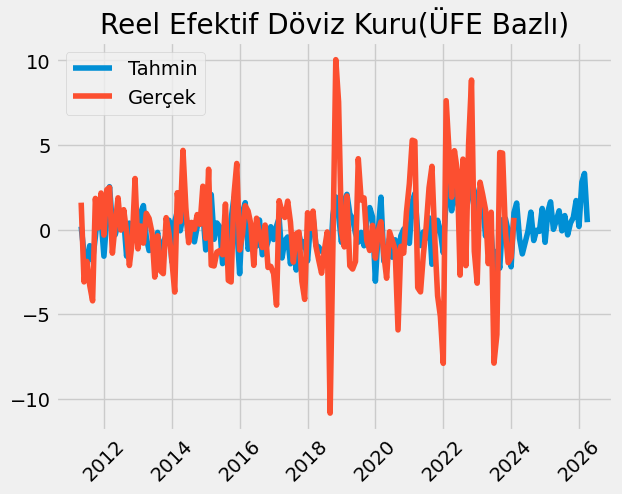

In [303]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [304]:
predictions["yhat"].tail(26)

ds
2024-02-29    1.570318
2024-03-31   -0.526021
2024-04-30   -1.436563
2024-05-31   -0.755023
2024-06-30   -0.096398
2024-07-31    1.033167
2024-08-31   -0.644124
2024-09-30   -0.037969
2024-10-31   -0.102678
2024-11-30    1.250308
2024-12-31   -0.749213
2025-01-31    1.089649
2025-02-28    1.640639
2025-03-31    0.016102
2025-04-30    0.525131
2025-05-31    1.111174
2025-06-30   -0.071813
2025-07-31    0.828697
2025-08-31   -0.311247
2025-09-30    0.385603
2025-10-31    0.717414
2025-11-30    1.717813
2025-12-31    0.188475
2026-01-31    2.804970
2026-02-28    3.319683
2026-03-31    0.438366
Name: yhat, dtype: float64

In [305]:
redktahmin=predictions["yhat"].tail(26).values
redktahmin1 = []
result = redk.iloc[-1,0]
for i in range(len(redktahmin)):
    result *= (1 + redktahmin[i] / 100)
    redktahmin1.append(result)

redktahmin1 = np.array(redktahmin1).reshape(-1, 1)
redktahmin1 = pd.DataFrame(redktahmin1)
redktahmin1.columns = ["REDK"]
redktahmin1 = redktahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(redktahmin1), freq="1M"))
redktahmin1

,REDK
2024-02-29,0.709207
2024-03-31,0.705477
2024-04-30,0.695342
2024-05-31,0.690092
2024-06-30,0.689427
2024-07-31,0.696550
2024-08-31,0.692063
2024-09-30,0.691800
2024-10-31,0.691090
2024-11-30,0.699731


In [306]:
motorintahmin.iloc[2]=5.6781
motorintahmin.iloc[1]=8.3196
motorintahmin.iloc[0]=-3.34

In [307]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [308]:
"""study.best_params"""

'study.best_params'

In [555]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean(),sanayitahmin1["Sanayi"],borctahmin1.shift(1)],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin1["REDKT"]
tahmindf["REDK"]=redktahmin1["REDK"]
#tahmindf["Politika Faizi"]=faiztahmin["Faiz"]
tahmindf["Perakende Satış"]=perakendetahmin




tahmindf["Politika Faizi"]=[42.5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,32.5,30,40,40,40]
tahmindf=tahmindf[['USD/TL', 'Motorin', 'Kredi Faizi', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]]

tahmindf.columns=["USD/TL","Motorin","Kredi Faizi","Zam","Enflasyon Belirsizliği",'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]
tahmindf=tahmindf.dropna(axis=0)










tahmindf.iloc[0,1]=8
tahmindf.iloc[0,-5]=1.28
tahmindf.iloc[0,-6]=0.90
tahmindf["Beklenti"]=3.80
tahmindf["Beklenti"].iloc[1:]=0
tahmindf=tahmindf.head(13)
tahmindf

,USD/TL,Motorin,Kredi Faizi,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Sanayi,Perakende Satış,Beklenti
2024-02-29,2.516622,8.000000,59.020000,0.0,3.410000,0.993354,4.898301,2.597683,51.890000,0.900000,1.280000,8.924516,45.0,0.763924,0.347187,3.8
2024-03-31,2.021779,3.184428,59.171710,0.0,3.185794,1.467158,3.931115,2.731435,54.836019,3.021087,0.705477,8.923326,45.0,-1.248568,2.275449,0.0
2024-04-30,1.868381,4.860089,59.682421,0.0,3.504568,3.772215,4.257236,3.538794,52.032172,2.938268,0.695342,8.951931,45.0,-2.271819,-3.506735,0.0
2024-05-31,1.836484,5.174548,60.164687,0.0,3.372782,5.177126,4.213795,3.769628,52.386891,2.807337,0.690092,9.068261,45.0,1.810625,3.578296,0.0
2024-06-30,1.823183,1.715990,60.357410,0.0,3.517948,4.093669,4.275757,3.604537,54.043113,2.917402,0.689427,9.116040,45.0,0.758577,5.356224,0.0
2024-07-31,1.790538,0.072708,60.235561,0.0,3.396365,2.749236,2.843438,2.768182,52.367740,2.991092,0.696550,9.170229,45.0,0.523067,-0.663651,0.0
2024-08-31,1.759042,3.301896,59.956848,0.0,3.415980,3.163442,3.593886,2.178144,52.652536,2.937100,0.692063,9.248216,45.0,0.010562,-3.999949,0.0
2024-09-30,1.728634,0.407067,59.721579,0.0,3.214621,1.627241,3.232160,2.029747,53.579405,2.967177,0.691800,9.303553,45.0,0.658587,0.025459,0.0
2024-10-31,1.680790,3.585274,59.648698,0.0,3.186206,3.553357,2.921967,2.125622,52.581444,2.995394,0.691090,9.358690,45.0,-1.507460,1.493126,0.0
2024-11-30,1.671171,-1.524379,59.732589,0.0,2.793435,3.662121,3.036143,2.172923,51.578690,3.109475,0.699731,9.431034,45.0,0.610730,0.446150,0.0


In [556]:
data.iloc[-1,2]=49.11
data.iloc[-1,5]=borctahmin.iloc[0]
data.iloc[-1,-4]=9.0

In [557]:
tahmindf=tahmindf.drop(["Sanayi","Perakende Satış","Kredi Faizi"],axis=1)

In [591]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
2014-01-31,3.732429,2.881984,3.944616,13.80,14.2,3.604096,0.820000,3.375162,-0.584687,2.669930,8.850000,-3.691204,-5.094658,9.200000,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,0.0,-0.850238,0.730000,1.804994,0.808574,1.876850,10.750000,2.179150,0.919060,9.500000,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,0.0,0.128936,0.800000,0.451349,0.193691,0.822203,11.650000,0.471546,0.641623,9.500000,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,0.0,-0.863760,0.730000,0.796760,0.478162,-0.154556,10.750000,4.682667,5.892031,9.700000,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,0.0,-1.367417,0.800000,-0.362357,0.091080,0.146305,10.430000,1.283880,2.058652,9.700000,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,1.680790,3.585274,NaN,NaN,0.0,NaN,3.186206,3.553357,2.921967,2.125622,52.581444,0.691090,2.995394,9.358690,45.00,0.00,NaN
2024-11-30,1.671171,-1.524379,NaN,NaN,0.0,NaN,2.793435,3.662121,3.036143,2.172923,51.578690,0.699731,3.109475,9.431034,45.00,0.00,NaN
2024-12-31,1.643702,2.347372,NaN,NaN,0.0,NaN,3.079122,2.509463,3.089515,2.185763,50.880649,0.694488,3.179880,9.494729,45.00,0.00,NaN
2025-01-31,1.581967,4.908487,NaN,NaN,30.0,NaN,3.185490,3.797269,2.899262,2.110101,49.073829,0.702056,3.354446,9.556564,45.00,0.00,NaN


In [592]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','TÜFE']
data1=data1[features]

In [594]:
data1.loc["2023-05-31","TÜFE"]+=2.88
"""data1.loc["2023-10-31","TÜFE"]-=0.22
data1.loc["2023-11-30","TÜFE"]-=1.01
data1.loc["2023-12-31","TÜFE"]-=0.33"""

'data1.loc["2023-10-31","TÜFE"]-=0.22\ndata1.loc["2023-11-30","TÜFE"]-=1.01\ndata1.loc["2023-12-31","TÜFE"]-=0.33'

In [596]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Kredi,Mevduat Faizi,REDK,Politika Faizi,TÜFE
0,0.461540,0.103629,1.139242,-0.642330,0.365711,0.577357,-0.847053,-1.225905,-0.617269,0.057024
1,0.245504,-0.063429,-0.299260,-0.676097,-0.216257,0.042690,-0.704313,0.697687,-0.593576,-0.625907
2,0.070036,-0.617082,-0.299260,-0.649834,-0.717973,-0.668317,-0.636700,0.138141,-0.590066,-0.318603
3,-1.107735,-1.166864,-0.299260,-0.676097,-0.589949,-1.326814,-0.704313,1.518037,-0.611127,-0.221945
4,-1.266911,-0.377335,-0.299260,-0.649834,-1.019566,-1.123984,-0.728354,0.404326,-0.655003,-0.640434
...,...,...,...,...,...,...,...,...,...,...
129,-0.172592,0.201857,-0.299260,0.245450,0.431757,0.210403,2.438318,0.210081,2.457591,NaN
130,-0.175565,-0.511810,-0.299260,0.098086,0.472070,0.242292,2.362985,0.212913,2.457591,NaN
131,-0.184055,0.028959,-0.299260,0.205273,0.044848,0.250948,2.310544,0.211195,2.457591,NaN
132,-0.203137,0.386671,2.739829,0.245181,0.522161,0.199940,2.174805,0.213674,2.457591,NaN


In [1306]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1][:-13]
y=scaled_data["TÜFE"][:-13]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)


In [598]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import keras
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-4)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    keras.utils.set_random_seed(42)
    model = Sequential()   
    model.add(LSTM(units=units1,activation=activation1,input_shape=(X_train.shape[1],1)))
    model.add(Dense(1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=100, batch_size=batch_size,verbose=0)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [599]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=200)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

[I 2024-03-01 16:49:40,823] A new study created in memory with name: no-name-378f09c8-93d2-4ef8-a35b-887bad3f87ad


1/1 [==============================] - 1s 519ms/step


[I 2024-03-01 16:49:51,555] Trial 0 finished with value: 1.2629701979933452 and parameters: {'learning_rate': 0.0001, 'units1': 118, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 1.2629701979933452.


1/1 [==============================] - 1s 501ms/step


[I 2024-03-01 16:50:13,910] Trial 1 finished with value: 0.9827928425647586 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.9827928425647586.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 16:50:19,452] Trial 2 finished with value: 9.240917824375355 and parameters: {'learning_rate': 0.0001, 'units1': 16, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.9827928425647586.


1/1 [==============================] - 1s 540ms/step


[I 2024-03-01 16:50:33,115] Trial 3 finished with value: 1.4417810106601727 and parameters: {'learning_rate': 0.0001, 'units1': 95, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.9827928425647586.


1/1 [==============================] - 1s 523ms/step


[I 2024-03-01 16:50:41,720] Trial 4 finished with value: 0.8522636836862713 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.8522636836862713.


1/1 [==============================] - 1s 549ms/step


[I 2024-03-01 16:50:49,850] Trial 5 finished with value: 0.7998954152987411 and parameters: {'learning_rate': 0.0001, 'units1': 76, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 634ms/step


[I 2024-03-01 16:50:56,470] Trial 6 finished with value: 1.3109099133080007 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 16:51:08,871] Trial 7 finished with value: 1.292984801267384 and parameters: {'learning_rate': 0.0001, 'units1': 126, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 606ms/step


[I 2024-03-01 16:51:31,008] Trial 8 finished with value: 1.419648019679829 and parameters: {'learning_rate': 0.0001, 'units1': 128, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 536ms/step


[I 2024-03-01 16:51:41,796] Trial 9 finished with value: 0.8227990224725761 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 542ms/step


[I 2024-03-01 16:51:49,560] Trial 10 finished with value: 0.9039876897445985 and parameters: {'learning_rate': 0.0001, 'units1': 76, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 531ms/step


[I 2024-03-01 16:51:57,493] Trial 11 finished with value: 3.909459309180546 and parameters: {'learning_rate': 0.0001, 'units1': 26, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 512ms/step


[I 2024-03-01 16:52:08,035] Trial 12 finished with value: 0.8990369719389109 and parameters: {'learning_rate': 0.0001, 'units1': 71, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 531ms/step


[I 2024-03-01 16:52:14,136] Trial 13 finished with value: 12.315167808323286 and parameters: {'learning_rate': 0.0001, 'units1': 6, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.7998954152987411.


1/1 [==============================] - 1s 540ms/step


[I 2024-03-01 16:52:22,466] Trial 14 finished with value: 0.7033589344237474 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 14 with value: 0.7033589344237474.


1/1 [==============================] - 1s 604ms/step


[I 2024-03-01 16:52:31,458] Trial 15 finished with value: 0.7323124149640049 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 14 with value: 0.7033589344237474.


1/1 [==============================] - 1s 602ms/step


[I 2024-03-01 16:52:39,642] Trial 16 finished with value: 0.3932164131634012 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 523ms/step


[I 2024-03-01 16:52:47,580] Trial 17 finished with value: 0.7040352543023101 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 524ms/step


[I 2024-03-01 16:52:54,030] Trial 18 finished with value: 1.3937277565343813 and parameters: {'learning_rate': 0.0001, 'units1': 25, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 534ms/step


[I 2024-03-01 16:53:02,654] Trial 19 finished with value: 20.21411762971268 and parameters: {'learning_rate': 0.0001, 'units1': 2, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 525ms/step


[I 2024-03-01 16:53:14,802] Trial 20 finished with value: 0.9547160670948237 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 630ms/step


[I 2024-03-01 16:53:23,531] Trial 21 finished with value: 0.4664613682074387 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 591ms/step


[I 2024-03-01 16:53:31,005] Trial 22 finished with value: 0.8658464268149454 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 545ms/step


[I 2024-03-01 16:53:39,358] Trial 23 finished with value: 1.9496257694866639 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 536ms/step


[I 2024-03-01 16:53:46,226] Trial 24 finished with value: 0.6127438046648275 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 541ms/step


[I 2024-03-01 16:53:53,404] Trial 25 finished with value: 0.838540658143411 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 538ms/step


[I 2024-03-01 16:54:02,234] Trial 26 finished with value: 0.8430018958149437 and parameters: {'learning_rate': 0.0001, 'units1': 68, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 525ms/step


[I 2024-03-01 16:54:11,732] Trial 27 finished with value: 0.9560194412096045 and parameters: {'learning_rate': 0.0001, 'units1': 88, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 530ms/step


[I 2024-03-01 16:54:17,640] Trial 28 finished with value: 7.048110288418207 and parameters: {'learning_rate': 0.0001, 'units1': 18, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 538ms/step


[I 2024-03-01 16:54:26,263] Trial 29 finished with value: 0.7078714449106419 and parameters: {'learning_rate': 0.0001, 'units1': 84, 'batch_size': 30, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 583ms/step


[I 2024-03-01 16:54:34,974] Trial 30 finished with value: 0.7871086830079648 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 16:54:42,881] Trial 31 finished with value: 0.6058099343312346 and parameters: {'learning_rate': 0.0001, 'units1': 43, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 595ms/step


[I 2024-03-01 16:54:51,114] Trial 32 finished with value: 0.5185320755871518 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 16:55:03,355] Trial 33 finished with value: 1.6305691760620382 and parameters: {'learning_rate': 0.0001, 'units1': 108, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 520ms/step


[I 2024-03-01 16:55:12,506] Trial 34 finished with value: 0.5582202804992288 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 16:55:20,217] Trial 35 finished with value: 0.6256509324545688 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 519ms/step


[I 2024-03-01 16:55:39,241] Trial 36 finished with value: 1.5830720030016459 and parameters: {'learning_rate': 0.0001, 'units1': 16, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 16:55:48,844] Trial 37 finished with value: 0.629204169566778 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 711ms/step


[I 2024-03-01 16:55:58,354] Trial 38 finished with value: 0.405237214848618 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 16:56:08,876] Trial 39 finished with value: 0.5464419052361787 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 0s 498ms/step


[I 2024-03-01 16:56:17,989] Trial 40 finished with value: 0.6982083835531587 and parameters: {'learning_rate': 0.0001, 'units1': 28, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 524ms/step


[I 2024-03-01 16:56:32,076] Trial 41 finished with value: 0.5090180821470194 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 507ms/step


[I 2024-03-01 16:57:04,876] Trial 42 finished with value: 0.5884911544649816 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 600ms/step


[I 2024-03-01 16:57:17,950] Trial 43 finished with value: 0.7189361862556122 and parameters: {'learning_rate': 0.0001, 'units1': 66, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 581ms/step


[I 2024-03-01 16:57:32,380] Trial 44 finished with value: 0.7309906107022512 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 589ms/step


[I 2024-03-01 16:57:40,973] Trial 45 finished with value: 0.5158870879062742 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 515ms/step


[I 2024-03-01 16:57:48,862] Trial 46 finished with value: 0.8120689910287223 and parameters: {'learning_rate': 0.0001, 'units1': 74, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 536ms/step


[I 2024-03-01 16:58:01,820] Trial 47 finished with value: 1.5287318247287736 and parameters: {'learning_rate': 0.0001, 'units1': 21, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 16:58:09,152] Trial 48 finished with value: 1.100752581219304 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 16:58:16,983] Trial 49 finished with value: 0.7230852146116123 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 590ms/step


[I 2024-03-01 16:58:26,529] Trial 50 finished with value: 0.4223705397730204 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 508ms/step


[I 2024-03-01 16:58:34,199] Trial 51 finished with value: 0.5646792371098756 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 577ms/step


[I 2024-03-01 16:58:43,586] Trial 52 finished with value: 1.3558229772046717 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 587ms/step


[I 2024-03-01 16:58:52,648] Trial 53 finished with value: 0.5886869570597746 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 520ms/step


[I 2024-03-01 16:59:08,306] Trial 54 finished with value: 0.9463043689763352 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 520ms/step


[I 2024-03-01 16:59:17,039] Trial 55 finished with value: 0.452272739711095 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 16:59:25,682] Trial 56 finished with value: 1.2811834752385096 and parameters: {'learning_rate': 0.0001, 'units1': 23, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 516ms/step


[I 2024-03-01 16:59:35,227] Trial 57 finished with value: 0.7048286845256301 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 597ms/step


[I 2024-03-01 16:59:45,363] Trial 58 finished with value: 2.322795115173627 and parameters: {'learning_rate': 0.0001, 'units1': 12, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 582ms/step


[I 2024-03-01 16:59:51,691] Trial 59 finished with value: 3.770011105062057 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 538ms/step


[I 2024-03-01 17:00:02,970] Trial 60 finished with value: 0.9294785271987888 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 717ms/step


[I 2024-03-01 17:00:13,110] Trial 61 finished with value: 0.4327539862946978 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 579ms/step


[I 2024-03-01 17:00:22,071] Trial 62 finished with value: 0.6807226590583456 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 16 with value: 0.3932164131634012.


1/1 [==============================] - 1s 638ms/step


[I 2024-03-01 17:00:31,365] Trial 63 finished with value: 0.38852809660479254 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 531ms/step


[I 2024-03-01 17:00:40,442] Trial 64 finished with value: 0.38852809660479254 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:00:49,406] Trial 65 finished with value: 0.5582202804992288 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 541ms/step


[I 2024-03-01 17:00:59,621] Trial 66 finished with value: 0.5834255917779648 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 526ms/step


[I 2024-03-01 17:01:08,849] Trial 67 finished with value: 0.6650098899441552 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 534ms/step


[I 2024-03-01 17:01:17,824] Trial 68 finished with value: 0.6376446506065724 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 541ms/step


[I 2024-03-01 17:01:26,176] Trial 69 finished with value: 2.7121846815415243 and parameters: {'learning_rate': 0.0001, 'units1': 26, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 527ms/step


[I 2024-03-01 17:01:36,076] Trial 70 finished with value: 0.39096375584390436 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 527ms/step


[I 2024-03-01 17:01:45,549] Trial 71 finished with value: 0.39096375584390436 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:01:55,959] Trial 72 finished with value: 0.6921227115884458 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 549ms/step


[I 2024-03-01 17:02:05,797] Trial 73 finished with value: 0.9358126774880927 and parameters: {'learning_rate': 0.0001, 'units1': 68, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 642ms/step


[I 2024-03-01 17:02:14,761] Trial 74 finished with value: 0.596894018390404 and parameters: {'learning_rate': 0.0001, 'units1': 64, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 63 with value: 0.38852809660479254.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:02:24,404] Trial 75 finished with value: 0.38251641778253265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 552ms/step


[I 2024-03-01 17:02:36,894] Trial 76 finished with value: 0.5967307079580644 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 785ms/step


[I 2024-03-01 17:02:46,370] Trial 77 finished with value: 0.4376825379535296 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 537ms/step


[I 2024-03-01 17:02:54,777] Trial 78 finished with value: 0.9905917332328312 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 520ms/step


[I 2024-03-01 17:03:06,021] Trial 79 finished with value: 0.9422702557039045 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 548ms/step


[I 2024-03-01 17:03:15,629] Trial 80 finished with value: 0.785600746041213 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 689ms/step


[I 2024-03-01 17:03:27,916] Trial 81 finished with value: 0.6856409814153434 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 629ms/step


[I 2024-03-01 17:03:38,133] Trial 82 finished with value: 0.4327539862946978 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:03:46,712] Trial 83 finished with value: 0.5354256959140297 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 530ms/step


[I 2024-03-01 17:03:57,086] Trial 84 finished with value: 0.38852809660479254 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 596ms/step


[I 2024-03-01 17:04:07,611] Trial 85 finished with value: 0.5986871332589466 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 593ms/step


[I 2024-03-01 17:04:17,610] Trial 86 finished with value: 0.6162047845754112 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 601ms/step


[I 2024-03-01 17:04:34,216] Trial 87 finished with value: 1.212585081863638 and parameters: {'learning_rate': 0.0001, 'units1': 115, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 684ms/step


[I 2024-03-01 17:04:48,909] Trial 88 finished with value: 0.5197947528135648 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 551ms/step


[I 2024-03-01 17:04:59,244] Trial 89 finished with value: 0.39342249253667405 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 679ms/step


[I 2024-03-01 17:05:07,713] Trial 90 finished with value: 0.7033589344237474 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 526ms/step


[I 2024-03-01 17:05:17,651] Trial 91 finished with value: 0.4741920157942991 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 542ms/step


[I 2024-03-01 17:05:25,662] Trial 92 finished with value: 1.0665887375848153 and parameters: {'learning_rate': 0.0001, 'units1': 29, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 528ms/step


[I 2024-03-01 17:05:35,353] Trial 93 finished with value: 0.39151671620539547 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 525ms/step


[I 2024-03-01 17:05:46,510] Trial 94 finished with value: 0.4412212054196314 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:05:56,322] Trial 95 finished with value: 0.6623887141314223 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 538ms/step


[I 2024-03-01 17:06:06,873] Trial 96 finished with value: 0.5303370813032509 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 75 with value: 0.38251641778253265.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:06:15,819] Trial 97 finished with value: 0.3790322574828648 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 537ms/step


[I 2024-03-01 17:06:29,322] Trial 98 finished with value: 0.6786685355401473 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 520ms/step


[I 2024-03-01 17:06:39,356] Trial 99 finished with value: 0.4309522626639988 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 524ms/step


[I 2024-03-01 17:06:48,400] Trial 100 finished with value: 0.5809710068763912 and parameters: {'learning_rate': 0.0001, 'units1': 33, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 522ms/step


[I 2024-03-01 17:06:56,741] Trial 101 finished with value: 0.5886869570597746 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 513ms/step


[I 2024-03-01 17:07:06,107] Trial 102 finished with value: 0.6866797598156197 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 17:07:15,306] Trial 103 finished with value: 0.6864757307272776 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 546ms/step


[I 2024-03-01 17:07:24,386] Trial 104 finished with value: 0.39342249253667405 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 17:07:33,171] Trial 105 finished with value: 0.8767028894649416 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 510ms/step


[I 2024-03-01 17:07:42,609] Trial 106 finished with value: 0.6623887141314223 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 530ms/step


[I 2024-03-01 17:07:53,714] Trial 107 finished with value: 0.6556608397840666 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 538ms/step


[I 2024-03-01 17:08:02,198] Trial 108 finished with value: 0.5152949376474375 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 17:08:15,027] Trial 109 finished with value: 0.5896869666391101 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 579ms/step


[I 2024-03-01 17:08:25,474] Trial 110 finished with value: 0.9386389204208369 and parameters: {'learning_rate': 0.0001, 'units1': 81, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 531ms/step


[I 2024-03-01 17:08:35,007] Trial 111 finished with value: 0.5457982869930947 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 560ms/step


[I 2024-03-01 17:08:44,836] Trial 112 finished with value: 0.4325855213225811 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 569ms/step


[I 2024-03-01 17:08:52,754] Trial 113 finished with value: 0.4021498665796983 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 551ms/step


[I 2024-03-01 17:09:01,602] Trial 114 finished with value: 0.3949314017229644 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 500ms/step


[I 2024-03-01 17:09:09,656] Trial 115 finished with value: 0.6256509324545688 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 512ms/step


[I 2024-03-01 17:09:19,254] Trial 116 finished with value: 1.121019939202371 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 508ms/step


[I 2024-03-01 17:09:29,505] Trial 117 finished with value: 0.5796911416925382 and parameters: {'learning_rate': 0.0001, 'units1': 43, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 17:09:40,424] Trial 118 finished with value: 0.719714130643815 and parameters: {'learning_rate': 0.0001, 'units1': 64, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 513ms/step


[I 2024-03-01 17:09:49,635] Trial 119 finished with value: 0.6797038768924586 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 576ms/step


[I 2024-03-01 17:09:58,461] Trial 120 finished with value: 2.521037246841726 and parameters: {'learning_rate': 0.0001, 'units1': 24, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 660ms/step


[I 2024-03-01 17:10:06,452] Trial 121 finished with value: 0.4021498665796983 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 510ms/step


[I 2024-03-01 17:10:15,837] Trial 122 finished with value: 0.5443213099763499 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 571ms/step


[I 2024-03-01 17:10:23,483] Trial 123 finished with value: 0.44473003850808385 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 518ms/step


[I 2024-03-01 17:10:31,199] Trial 124 finished with value: 1.9275576039013236 and parameters: {'learning_rate': 0.0001, 'units1': 27, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 560ms/step


[I 2024-03-01 17:10:37,021] Trial 125 finished with value: 1.146328868477653 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 523ms/step


[I 2024-03-01 17:10:46,937] Trial 126 finished with value: 0.565562455963235 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 533ms/step


[I 2024-03-01 17:10:54,641] Trial 127 finished with value: 1.1664533258355176 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 592ms/step


[I 2024-03-01 17:11:04,181] Trial 128 finished with value: 0.3790322574828648 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 17:11:15,230] Trial 129 finished with value: 0.7686497923291907 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 512ms/step


[I 2024-03-01 17:11:25,662] Trial 130 finished with value: 0.4325855213225811 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 543ms/step


[I 2024-03-01 17:11:37,300] Trial 131 finished with value: 1.3079343398141614 and parameters: {'learning_rate': 0.0001, 'units1': 101, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 535ms/step


[I 2024-03-01 17:11:46,353] Trial 132 finished with value: 0.6422031498509876 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 529ms/step


[I 2024-03-01 17:11:56,762] Trial 133 finished with value: 0.40817779941942783 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 594ms/step


[I 2024-03-01 17:12:08,108] Trial 134 finished with value: 0.6140985858358975 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 597ms/step


[I 2024-03-01 17:12:16,574] Trial 135 finished with value: 0.4601046242215758 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 536ms/step


[I 2024-03-01 17:12:25,568] Trial 136 finished with value: 0.4998384368229472 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 543ms/step


[I 2024-03-01 17:12:35,816] Trial 137 finished with value: 0.39151671620539547 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 591ms/step


[I 2024-03-01 17:12:48,744] Trial 138 finished with value: 0.9320495124250695 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 17:12:58,461] Trial 139 finished with value: 0.40740888570677 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 513ms/step


[I 2024-03-01 17:13:09,095] Trial 140 finished with value: 0.506815177258813 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 1s/step


[I 2024-03-01 17:13:18,628] Trial 141 finished with value: 0.4436321320448666 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 535ms/step


[I 2024-03-01 17:13:27,931] Trial 142 finished with value: 0.7175433578271927 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 550ms/step


[I 2024-03-01 17:13:35,468] Trial 143 finished with value: 1.396784742585537 and parameters: {'learning_rate': 0.0001, 'units1': 36, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 514ms/step


[I 2024-03-01 17:13:44,250] Trial 144 finished with value: 0.5354256959140297 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 587ms/step


[I 2024-03-01 17:13:53,019] Trial 145 finished with value: 0.8307549357161531 and parameters: {'learning_rate': 0.0001, 'units1': 32, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 555ms/step


[I 2024-03-01 17:14:02,579] Trial 146 finished with value: 0.6215391363769153 and parameters: {'learning_rate': 0.0001, 'units1': 43, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 501ms/step


[I 2024-03-01 17:14:12,506] Trial 147 finished with value: 0.6856409814153434 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 516ms/step


[I 2024-03-01 17:14:21,802] Trial 148 finished with value: 0.6622504767041572 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 536ms/step


[I 2024-03-01 17:14:31,959] Trial 149 finished with value: 0.42893160354504184 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:14:40,294] Trial 150 finished with value: 0.7646164964826818 and parameters: {'learning_rate': 0.0001, 'units1': 60, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 555ms/step


[I 2024-03-01 17:14:48,728] Trial 151 finished with value: 0.41619866260720784 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 621ms/step


[I 2024-03-01 17:14:57,792] Trial 152 finished with value: 0.6422031498509876 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 712ms/step


[I 2024-03-01 17:15:08,855] Trial 153 finished with value: 0.4789752227338442 and parameters: {'learning_rate': 0.0001, 'units1': 38, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 97 with value: 0.3790322574828648.


1/1 [==============================] - 1s 660ms/step


[I 2024-03-01 17:15:18,076] Trial 154 finished with value: 0.3617215599067582 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 537ms/step


[I 2024-03-01 17:15:27,675] Trial 155 finished with value: 0.4237303635639649 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 630ms/step


[I 2024-03-01 17:15:39,073] Trial 156 finished with value: 0.7746764525273929 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 514ms/step


[I 2024-03-01 17:15:48,510] Trial 157 finished with value: 0.40133037638163827 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 567ms/step


[I 2024-03-01 17:15:56,435] Trial 158 finished with value: 0.45819027909877263 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 551ms/step


[I 2024-03-01 17:16:04,963] Trial 159 finished with value: 0.7323124149640049 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 518ms/step


[I 2024-03-01 17:16:15,495] Trial 160 finished with value: 0.7067807259648644 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 542ms/step


[I 2024-03-01 17:16:24,281] Trial 161 finished with value: 0.4209101450217016 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 546ms/step


[I 2024-03-01 17:16:32,019] Trial 162 finished with value: 0.5646792371098756 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 608ms/step


[I 2024-03-01 17:16:40,717] Trial 163 finished with value: 0.3617215599067582 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 154 with value: 0.3617215599067582.


1/1 [==============================] - 1s 560ms/step


[I 2024-03-01 17:16:48,493] Trial 164 finished with value: 0.34698633615248803 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 555ms/step


[I 2024-03-01 17:16:57,685] Trial 165 finished with value: 0.7939498962985668 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 510ms/step


[I 2024-03-01 17:17:07,063] Trial 166 finished with value: 0.47676948441777717 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 504ms/step


[I 2024-03-01 17:17:14,782] Trial 167 finished with value: 0.7865430090553307 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:17:24,185] Trial 168 finished with value: 0.44767121419525474 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 526ms/step


[I 2024-03-01 17:17:34,034] Trial 169 finished with value: 0.37650895201491563 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 546ms/step


[I 2024-03-01 17:17:44,117] Trial 170 finished with value: 0.40817779941942783 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:17:50,886] Trial 171 finished with value: 0.5001869700589224 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 678ms/step


[I 2024-03-01 17:18:00,604] Trial 172 finished with value: 0.8726621986398301 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 706ms/step


[I 2024-03-01 17:18:10,003] Trial 173 finished with value: 0.6791188527526959 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 525ms/step


[I 2024-03-01 17:18:19,575] Trial 174 finished with value: 0.8395356971451592 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:18:29,167] Trial 175 finished with value: 0.576894418423865 and parameters: {'learning_rate': 0.0001, 'units1': 43, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 532ms/step


[I 2024-03-01 17:18:39,152] Trial 176 finished with value: 0.7881788970392739 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 602ms/step


[I 2024-03-01 17:18:48,298] Trial 177 finished with value: 0.37650895201491563 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 530ms/step


[I 2024-03-01 17:18:58,656] Trial 178 finished with value: 0.7433028743673139 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 546ms/step


[I 2024-03-01 17:19:07,434] Trial 179 finished with value: 0.38251641778253265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 524ms/step


[I 2024-03-01 17:19:18,499] Trial 180 finished with value: 0.38251641778253265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 545ms/step


[I 2024-03-01 17:19:27,899] Trial 181 finished with value: 0.38251641778253265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 524ms/step


[I 2024-03-01 17:19:36,988] Trial 182 finished with value: 0.38251641778253265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 522ms/step


[I 2024-03-01 17:19:46,018] Trial 183 finished with value: 0.5400392887449216 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 607ms/step


[I 2024-03-01 17:19:54,101] Trial 184 finished with value: 0.3914882845322061 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 510ms/step


[I 2024-03-01 17:20:00,824] Trial 185 finished with value: 0.3760606007336355 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 510ms/step


[I 2024-03-01 17:20:07,733] Trial 186 finished with value: 0.3819368463662978 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 512ms/step


[I 2024-03-01 17:20:14,756] Trial 187 finished with value: 0.7592201472997465 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 509ms/step


[I 2024-03-01 17:20:22,246] Trial 188 finished with value: 0.4811281361838639 and parameters: {'learning_rate': 0.0001, 'units1': 66, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 507ms/step


[I 2024-03-01 17:20:28,864] Trial 189 finished with value: 0.726826932183266 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 511ms/step


[I 2024-03-01 17:20:35,282] Trial 190 finished with value: 0.6318383266845848 and parameters: {'learning_rate': 0.0001, 'units1': 60, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 507ms/step


[I 2024-03-01 17:20:42,746] Trial 191 finished with value: 0.9459504402651876 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 545ms/step


[I 2024-03-01 17:20:51,478] Trial 192 finished with value: 0.4647873143350323 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 517ms/step


[I 2024-03-01 17:20:58,509] Trial 193 finished with value: 0.3766235087835044 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 551ms/step


[I 2024-03-01 17:21:05,661] Trial 194 finished with value: 0.7690805903417338 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 522ms/step


[I 2024-03-01 17:21:13,749] Trial 195 finished with value: 0.4967604596444555 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 561ms/step


[I 2024-03-01 17:21:22,221] Trial 196 finished with value: 0.48948963433908627 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 583ms/step


[I 2024-03-01 17:21:28,745] Trial 197 finished with value: 0.8826043217544965 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 164 with value: 0.34698633615248803.


1/1 [==============================] - 1s 549ms/step


[I 2024-03-01 17:21:35,997] Trial 198 finished with value: 0.3227390985531265 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 30, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 198 with value: 0.3227390985531265.


1/1 [==============================] - 1s 521ms/step


[I 2024-03-01 17:21:44,527] Trial 199 finished with value: 0.33654273803028695 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 198 with value: 0.3227390985531265.


Best hyperparameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 30, 'activation1': 'tanh', 'optimizer': 'rmsprop'}


In [600]:
study.best_params

{'learning_rate': 0.0001,
 'units1': 51,
 'batch_size': 30,
 'activation1': 'tanh',
 'optimizer': 'rmsprop'}

In [603]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
model = Sequential()
model.add(LSTM(51,activation="tanh",input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=100, batch_size=30,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
4/4 [==============================] - 4s 294ms/step - loss: 0.7381 - mean_squared_error: 0.7381 - val_loss: 0.1910 - val_mean_squared_error: 0.1910
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.7409 - mean_squared_error: 0.7409 - val_loss: 0.1840 - val_mean_squared_error: 0.1840
Epoch 3/100
4/4 [==============================] - 0s 26ms/step - loss: 0.7142 - mean_squared_error: 0.7142 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.7150 - mean_squared_error: 0.7150 - val_loss: 0.1746 - val_mean_squared_error: 0.1746
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.6969 - mean_squared_error: 0.6969 - val_loss: 0.1696 - val_mean_squared_error: 0.1696
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 0.6951 - mean_squared_error: 0.6951 - val_loss: 0.1651 - val_mean_squared_error: 0.1651
Epoch 7/100
4/4 [======================

In [604]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 [==============================] - 1s 543ms/step


0.3269730938988544

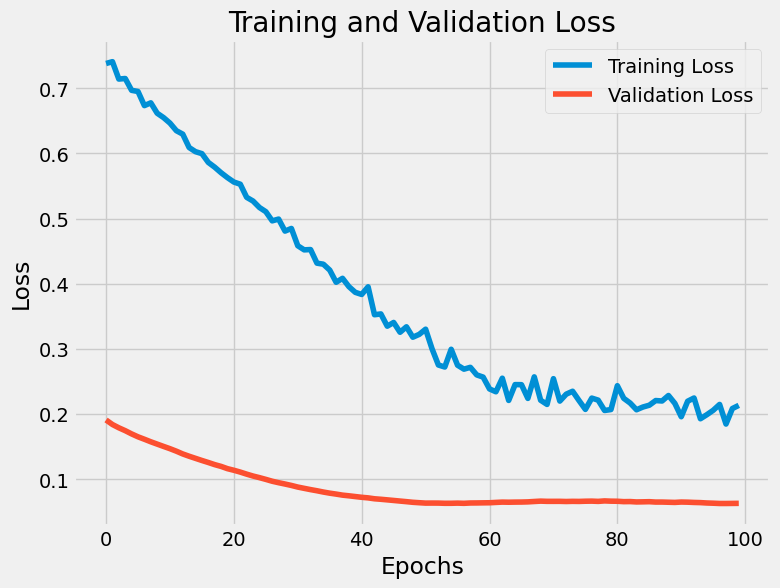

In [605]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [609]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-02-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[3,:]-=2.88
"""tahminler.iloc[8,1]+=0.22
tahminler.iloc[9,1]+=1.01
tahminler.iloc[10,1]+=0.29
tahminler.iloc[11,1]+=0.29"""
tahminler

1/1 [==============================] - 0s 39ms/step


,TÜFE,Tahmin
2023-02-28,3.145046,2.289654
2023-03-31,2.289480,2.843220
2023-04-30,2.385509,2.903409
2023-05-31,0.043076,0.283877
2023-06-30,3.920498,4.523471
2023-07-31,9.488824,9.466288
2023-08-31,9.086793,7.844220
2023-09-30,4.753114,5.056321
2023-10-31,3.433981,2.812725
2023-11-30,3.281097,2.878903


In [610]:
mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])

0.3269730938988544

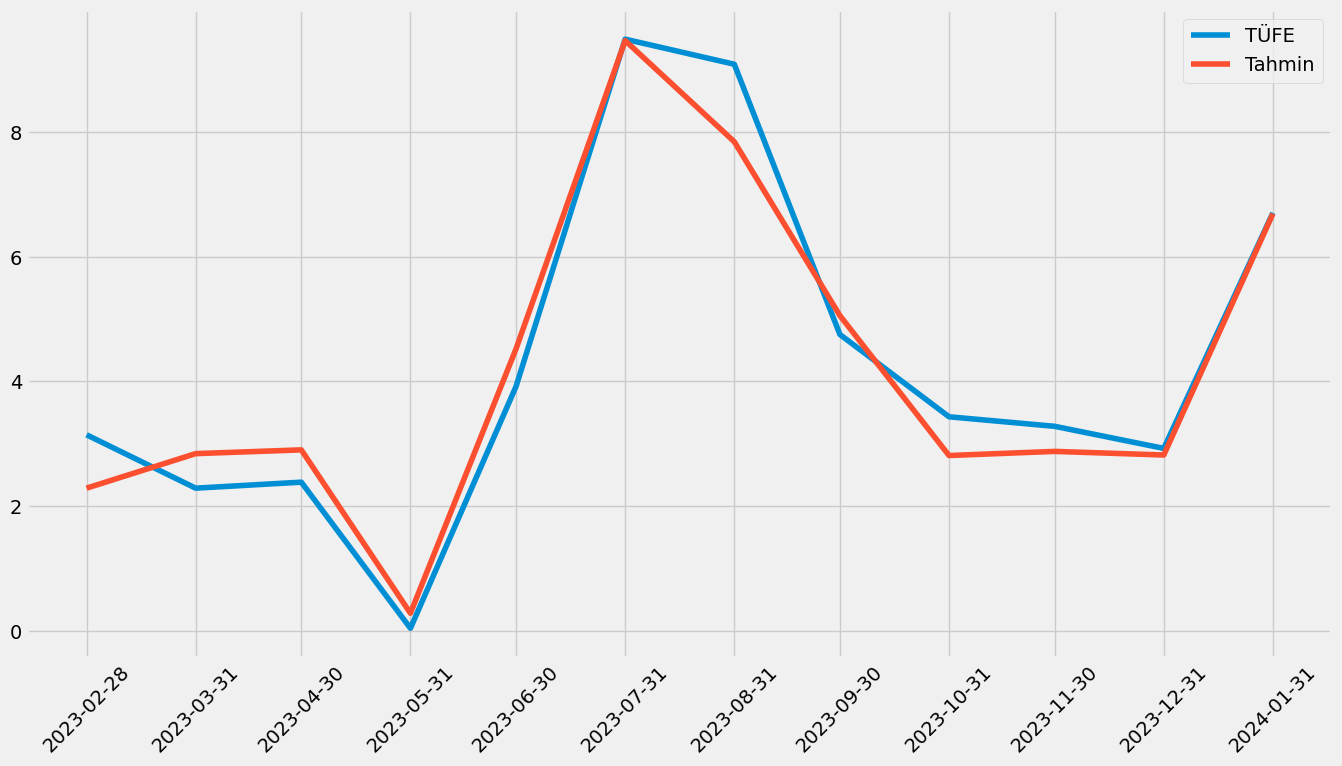

In [611]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="TÜFE")
plt.plot(tahminler["Tahmin"],label="Tahmin")
plt.xticks(tahminler.index,rotation=45)
plt.legend()
plt.show()

In [1307]:




import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
model = Sequential()
model.add(LSTM(51,activation="tanh",input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X, y, epochs=100, batch_size=3,verbose=1)

Epoch 1/100
41/41 [==============================] - 4s 7ms/step - loss: 0.8078 - mean_squared_error: 0.8078
Epoch 2/100
41/41 [==============================] - 0s 7ms/step - loss: 0.7461 - mean_squared_error: 0.7461
Epoch 3/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6797 - mean_squared_error: 0.6797
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.6166 - mean_squared_error: 0.6166
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.5594 - mean_squared_error: 0.5594
Epoch 6/100
41/41 [==============================] - 0s 7ms/step - loss: 0.4873 - mean_squared_error: 0.4873
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.4290 - mean_squared_error: 0.4290
Epoch 8/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3667 - mean_squared_error: 0.3667
Epoch 9/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3341 - mean_squared_error: 0.3341
Epoch 10/100
41/41 

In [1308]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-13:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-02-28",periods=13,freq="1M"))
pred

1/1 [==============================] - 1s 686ms/step


,TÜFE
2024-02-29,3.472042
2024-03-31,3.163850
2024-04-30,3.855086
2024-05-31,4.170527
2024-06-30,3.747684
2024-07-31,3.124216
2024-08-31,3.242897
2024-09-30,2.772055
2024-10-31,3.257716
2024-11-30,2.881221


In [618]:
tüfetahmin0 = []
result = 1984.02
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["LSTM"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,LSTM
2024-02-29,2052.906014
2024-03-31,2117.856878
2024-04-30,2199.502088
2024-05-31,2291.232906
2024-06-30,2377.101064
2024-07-31,2451.366838
2024-08-31,2530.862146
2024-09-30,2601.019041
2024-10-31,2685.752852
2024-11-30,2763.135316


In [350]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [351]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
2014-01-31,3.732429,2.881984,14.2,0.820000,3.375162,-0.584687,2.669930,8.850000,-3.691204,-5.094658,9.200000,9.96,1.06,2.250818
2014-02-28,3.033477,1.685899,0.0,0.730000,1.804994,0.808574,1.876850,10.750000,2.179150,0.919060,9.500000,10.23,0.69,1.171242
2014-03-31,2.465778,-2.278097,0.0,0.800000,0.451349,0.193691,0.822203,11.650000,0.471546,0.641623,9.500000,10.27,0.65,0.755368
2014-04-30,-1.344724,-6.214384,0.0,0.730000,0.796760,0.478162,-0.154556,10.750000,4.682667,5.892031,9.700000,10.03,0.76,0.374852
2014-05-31,-1.859714,-0.561578,0.0,0.800000,-0.362357,0.091080,0.146305,10.430000,1.283880,2.058652,9.700000,9.53,0.63,0.121778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,1.680790,3.585274,0.0,3.186206,3.553357,2.921967,2.125622,52.581444,0.691090,2.995394,9.358690,45.00,0.00,NaN
2024-11-30,1.671171,-1.524379,0.0,2.793435,3.662121,3.036143,2.172923,51.578690,0.699731,3.109475,9.431034,45.00,0.00,NaN
2024-12-31,1.643702,2.347372,0.0,3.079122,2.509463,3.089515,2.185763,50.880649,0.694488,3.179880,9.494729,45.00,0.00,NaN
2025-01-31,1.581967,4.908487,30.0,3.185490,3.797269,2.899262,2.110101,49.073829,0.702056,3.354446,9.556564,45.00,0.00,NaN


In [1301]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data["TÜFE"]
y_pred=pd.DataFrame()
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
            reg.fit(X_subset, y)
            y_pred[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])


            

In [1302]:
sonstd=y_pred.iloc[0,:].std()
subat=y_pred.iloc[0,:].mean()

In [1303]:
new_df = pd.DataFrame()
for index, row in y_pred.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred=y_pred[cols.values]

In [1304]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
sgdaylık.columns=["TÜFE"]
sgdaylık.iloc[0,0]=subat
sgdaylık

,TÜFE
2024-02-29,3.840020
2024-03-31,2.657485
2024-04-30,3.021662
2024-05-31,3.259965
2024-06-30,2.891402
2024-07-31,2.526600
2024-08-31,2.802559
2024-09-30,2.484276
2024-10-31,2.835655
2024-11-30,2.419178


In [1305]:

tüfetahmin1 = []
result = 1984.02
sgdaylık=np.array(sgdaylık).reshape(1,-1).ravel()
for i in range(len(sgdaylık)):
    result *= (1 + (sgdaylık[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,SGD Regressor
2024-02-29,2060.206761
2024-03-31,2114.956445
2024-04-30,2178.863285
2024-05-31,2249.893470
2024-06-30,2314.946939
2024-07-31,2373.436386
2024-08-31,2439.953352
2024-09-30,2500.568535
2024-10-31,2571.476029
2024-11-30,2633.684613


In [1285]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','REDKT','İşsizlik']
X=data[features]
y=data["TÜFE"]
y_pred1=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=LinearRegression()
            model.fit(X_subset, y)
            y_pred1[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf[selected_features]))


In [1286]:
sonstd=y_pred1.iloc[0,:].std()
subat=y_pred1.iloc[0,:].mean()

In [1287]:
new_df = pd.DataFrame()
for index, row in y_pred1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred1=y_pred1[cols.values]

In [1299]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
linearaylık.columns=["TÜFE"]
linearaylık.iloc[0,0]=subat
linearaylık

,TÜFE
2024-02-29,3.905862
2024-03-31,2.739679
2024-04-30,2.984907
2024-05-31,3.215482
2024-06-30,2.987363
2024-07-31,2.601419
2024-08-31,2.757075
2024-09-30,2.556212
2024-10-31,2.806373
2024-11-30,2.514729


In [1300]:
linearaylık=np.array(linearaylık)
linearaylık=linearaylık.ravel()
tüfetahmin2=[]
result=1984.02
for i in range(len(linearaylık)):
    result *= (1 + linearaylık[i] / 100)
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2


,Linear Regression
2024-02-29,2061.513085
2024-03-31,2117.991929
2024-04-30,2181.212024
2024-05-31,2251.348496
2024-06-30,2318.604457
2024-07-31,2378.921064
2024-08-31,2444.509711
2024-09-30,2506.996569
2024-10-31,2577.352233
2024-11-30,2642.165665


In [1317]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred2=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lasso(alpha=0.001)
            reg.fit(X_subset,y)
            y_pred2[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])

In [1318]:
sonstd=y_pred2.iloc[0,:].std()
subat=y_pred2.iloc[0,:].mean()

In [1319]:
new_df = pd.DataFrame()
for index, row in y_pred2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred2=y_pred2[cols.values]

In [1320]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
lassoaylık.columns=["TÜFE"]
lassoaylık.iloc[0,0]=subat
lassoaylık

,TÜFE
2024-02-29,3.807993
2024-03-31,2.695922
2024-04-30,3.085353
2024-05-31,3.253528
2024-06-30,2.929619
2024-07-31,2.544847
2024-08-31,2.838323
2024-09-30,2.488546
2024-10-31,2.871504
2024-11-30,2.440600


In [1321]:



tüfetahmin5 = []
result = 1984.02
lassoaylık=np.array(lassoaylık).ravel()
for i in range(len(lassoaylık)):
    result *= (1 + lassoaylık[i] / 100)
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Lasso Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin5), freq="1M"))
tüfetahmin5

,Lasso Regression
2024-02-29,2059.571339
2024-03-31,2115.095775
2024-04-30,2180.353950
2024-05-31,2251.292382
2024-06-30,2317.246675
2024-07-31,2376.217056
2024-08-31,2443.661766
2024-09-30,2504.473404
2024-10-31,2576.389449
2024-11-30,2639.268816


In [1322]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred3=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lars(random_state=0)
            reg.fit(X_subset,y)
            y_pred3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred3.iloc[0,:].std()

In [1323]:
subat=y_pred3.iloc[0,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred3=y_pred3[cols.values]


In [1324]:

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
larsaylık.columns=["TÜFE"]
larsaylık.iloc[0,0]=subat
larsaylık

,TÜFE
2024-02-29,3.807138
2024-03-31,2.696052
2024-04-30,3.086393
2024-05-31,3.251939
2024-06-30,2.930641
2024-07-31,2.544805
2024-08-31,2.833345
2024-09-30,2.497458
2024-10-31,2.867158
2024-11-30,2.440866


In [1325]:



tüfetahmin6 = []
result = 1984.02
larstahmin=np.array(larsaylık).ravel()
for i in range(len(larstahmin)):
    result *= (1 + larstahmin[i] / 100)
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Lars Regression"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin6), freq="1M"))
tüfetahmin6


,Lars Regression
2024-02-29,2059.554377
2024-03-31,2115.081025
2024-04-30,2180.360746
2024-05-31,2251.264750
2024-06-30,2317.241242
2024-07-31,2376.210505
2024-08-31,2443.536758
2024-09-30,2504.563052
2024-10-31,2576.372838
2024-11-30,2639.258653


In [1330]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Kredi', 'Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred4=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            krr = KernelRidge()
            krr.fit(X_subset,y)
            y_pred4[f'Tahmin_{r}_{selected_features}'] = krr.predict(tahmindf[selected_features])
sonstd=y_pred4.iloc[0,:].std()
subat=y_pred4.iloc[0,:].mean()

In [1331]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
kernelaylık.columns=["TÜFE"]
kernelaylık.iloc[0,0]=subat
kernelaylık

,TÜFE
2024-02-29,3.606954
2024-03-31,2.867640
2024-04-30,3.267081
2024-05-31,3.391788
2024-06-30,3.293932
2024-07-31,2.851755
2024-08-31,2.705536
2024-09-30,2.756716
2024-10-31,2.687290
2024-11-30,2.601107


In [1332]:


tüfetahmin7 = []
result = 1984.02
krrtahmin=np.array(kernelaylık).ravel()
for i in range(len(krrtahmin)):
    result *= (1 + krrtahmin[i] / 100)
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Regression"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin7), freq="1M"))
tüfetahmin7

,Kernel Regression
2024-02-29,2055.582698
2024-03-31,2114.529415
2024-04-30,2183.612798
2024-05-31,2257.676321
2024-06-30,2332.042651
2024-07-31,2398.546790
2024-08-31,2463.440348
2024-09-30,2531.350400
2024-10-31,2599.375121
2024-11-30,2666.987654


In [1333]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred5=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            kernel = DotProduct() + WhiteKernel()
            gpr = GaussianProcessRegressor(kernel=kernel)
            gpr.fit(X_subset, y)
            y_pred5[f'Tahmin_{r}_{selected_features}'] = gpr.predict(tahmindf[selected_features])
sonstd=y_pred5.iloc[0,:].std()
subat=y_pred5.iloc[0,:].mean()


In [1334]:
new_df = pd.DataFrame()
for index, row in y_pred5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred5=y_pred5[cols.values]

In [1335]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
gaussaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
gaussaylık.columns=["TÜFE"]
gaussaylık.iloc[0,0]=subat
gaussaylık

,TÜFE
2024-02-29,3.656594
2024-03-31,2.594328
2024-04-30,2.943506
2024-05-31,3.149217
2024-06-30,2.822940
2024-07-31,2.499962
2024-08-31,2.729637
2024-09-30,2.422387
2024-10-31,2.761850
2024-11-30,2.332812


In [1336]:


tüfe = 1984.02  
tüfetahmin8 = []
gaustahmin=np.array(gaussaylık).ravel()
gaustahmin=1+(gaustahmin/100)
for elem in gaustahmin:
    tüfe *= elem  
    tüfetahmin8.append(tüfe)
tüfetahmin8=pd.DataFrame(tüfetahmin8)
tüfetahmin8=tüfetahmin8.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin8),freq="1M"))
tüfetahmin8.columns=["Gaussian Regression"]

tüfetahmin8
        

,Gaussian Regression
2024-02-29,2056.567560
2024-03-31,2109.921658
2024-04-30,2172.027329
2024-05-31,2240.429181
2024-06-30,2303.675142
2024-07-31,2361.266140
2024-08-31,2425.720123
2024-09-30,2484.480445
2024-10-31,2553.098077
2024-11-30,2612.657057


In [1337]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred6=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.BayesianRidge()
            reg.fit(X_subset, y)
            y_pred6[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred6.iloc[0,:].std()
subat=y_pred6.iloc[0,:].mean()

In [1338]:
new_df = pd.DataFrame()
for index, row in y_pred6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred6=y_pred6[cols.values]

In [1339]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
bayesaylık.columns=["TÜFE"]
bayesaylık.iloc[0,0]=subat
bayesaylık

,TÜFE
2024-02-29,3.840932
2024-03-31,2.732115
2024-04-30,3.057242
2024-05-31,3.236746
2024-06-30,2.908646
2024-07-31,2.568013
2024-08-31,2.815486
2024-09-30,2.522678
2024-10-31,2.825414
2024-11-30,2.443780


In [1340]:



tüfe = 1984.02
tüfetahmin9 = []
bayestahmin=np.array(bayesaylık).ravel()
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  
    tüfetahmin9.append(tüfe)
tüfetahmin9=pd.DataFrame(tüfetahmin9)
tüfetahmin9=tüfetahmin9.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin9),freq="1M"))
tüfetahmin9.columns=["Bayessian Regression"]

tüfetahmin9

,Bayessian Regression
2024-02-29,2060.224849
2024-03-31,2116.512564
2024-04-30,2181.219466
2024-05-31,2251.819996
2024-06-30,2317.317468
2024-07-31,2376.826479
2024-08-31,2443.745688
2024-09-30,2505.393521
2024-10-31,2576.181251
2024-11-30,2639.137460


In [1345]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi',  'Kredi', 'Mevduat Faizi','REDK','REDKT','Politika Faizi','İşsizlik','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred7=pd.DataFrame(index=pd.date_range(start="2024-02-28",freq="M",periods=13))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model = sm.RLM(y, X_subset, M=sm.robust.norms.HuberT()).fit()
            y_pred7[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
sonstd=y_pred7.iloc[0,:].std()
subat=y_pred7.iloc[0,:].mean()

In [1346]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred7.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
robustaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-02-28",periods=13,freq="M"))
robustaylık.columns=["TÜFE"]
robustaylık.iloc[0,0]=subat
robustaylık

,TÜFE
2024-02-29,3.471675
2024-03-31,2.526432
2024-04-30,2.842814
2024-05-31,2.947446
2024-06-30,2.863931
2024-07-31,2.537381
2024-08-31,2.286973
2024-09-30,2.255142
2024-10-31,2.283500
2024-11-30,2.267390


In [1347]:


robusttahmin=np.array(robustaylık).ravel()

tüfetahmin21 = []
result = 1984.02
for i in range(len(robusttahmin)):
    result *= (1 + robusttahmin[i] / 100)
    tüfetahmin21.append(result)

tüfetahmin21 = np.array(tüfetahmin21).reshape(-1, 1)
tüfetahmin21 = pd.DataFrame(tüfetahmin21)
tüfetahmin21.columns = ["Robust Regression"]
tüfetahmin21 = tüfetahmin21.set_index(pd.date_range(start="2024-02-28", periods=len(tüfetahmin21), freq="1M"))
tüfetahmin21

,Robust Regression
2024-02-29,2052.898724
2024-03-31,2104.763811
2024-04-30,2164.598333
2024-05-31,2228.398698
2024-06-30,2292.218489
2024-07-31,2350.380815
2024-08-31,2404.133401
2024-09-30,2458.350033
2024-10-31,2514.486466
2024-11-30,2571.499686


In [1348]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin5["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin6["Lars Regression"]
tüfetahmin["Kernel Regression"]=tüfetahmin7["Kernel Regression"]
tüfetahmin["Gaussian Regression"]=tüfetahmin8["Gaussian Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin9["Bayessian Regression"]
tüfetahmin["LSTM"]=tüfetahmin0["LSTM"]
tüfetahmin["Robust Regression"]=tüfetahmin21["Robust Regression"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-02-29,2060.206761,2061.513085,2059.571339,2059.554377,2055.582698,2056.567560,2060.224849,2052.906014,2052.898724,2057.669490
2024-03-31,2114.956445,2117.991929,2115.095775,2115.081025,2114.529415,2109.921658,2116.512564,2117.856878,2104.763811,2114.078833
2024-04-30,2178.863285,2181.212024,2180.353950,2180.360746,2183.612798,2172.027329,2181.219466,2199.502088,2164.598333,2180.194447
2024-05-31,2249.893470,2251.348496,2251.292382,2251.264750,2257.676321,2240.429181,2251.819996,2291.232906,2228.398698,2252.595133
2024-06-30,2314.946939,2318.604457,2317.246675,2317.241242,2332.042651,2303.675142,2317.317468,2377.101064,2292.218489,2321.154903
2024-07-31,2373.436386,2378.921064,2376.217056,2376.210505,2398.546790,2361.266140,2376.826479,2451.366838,2350.380815,2382.574675
2024-08-31,2439.953352,2444.509711,2443.661766,2443.536758,2463.440348,2425.720123,2443.745688,2530.862146,2404.133401,2448.840366
2024-09-30,2500.568535,2506.996569,2504.473404,2504.563052,2531.350400,2484.480445,2505.393521,2601.019041,2458.350033,2510.799444
2024-10-31,2571.476029,2577.352233,2576.389449,2576.372838,2599.375121,2553.098077,2576.181251,2685.752852,2514.486466,2581.164924
2024-11-30,2633.684613,2642.165665,2639.268816,2639.258653,2666.987654,2612.657057,2639.137460,2763.135316,2571.499686,2645.310547


In [1349]:
dates=pd.date_range('2006-02-01','2024-02-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)





dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[8]]

dfas11=pd.DataFrame()
dfas11=pd.concat([df["CPI"],tüfetahmin.iloc[1:,9]],axis=0)
dfas11=pd.DataFrame(dfas11)
dfas11.columns=[tüfetahmin.columns[9]]








dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9,dfas10],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [1350]:

tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-02-29,2060.206761,2061.513085,2059.571339,2059.554377,2055.582698,2056.567560,2060.224849,2052.906014,2052.898724,2057.669490
2024-03-31,2114.956445,2117.991929,2115.095775,2115.081025,2114.529415,2109.921658,2116.512564,2117.856878,2104.763811,2114.078833
2024-04-30,2178.863285,2181.212024,2180.353950,2180.360746,2183.612798,2172.027329,2181.219466,2199.502088,2164.598333,2180.194447
2024-05-31,2249.893470,2251.348496,2251.292382,2251.264750,2257.676321,2240.429181,2251.819996,2291.232906,2228.398698,2252.595133
2024-06-30,2314.946939,2318.604457,2317.246675,2317.241242,2332.042651,2303.675142,2317.317468,2377.101064,2292.218489,2321.154903
2024-07-31,2373.436386,2378.921064,2376.217056,2376.210505,2398.546790,2361.266140,2376.826479,2451.366838,2350.380815,2382.574675
2024-08-31,2439.953352,2444.509711,2443.661766,2443.536758,2463.440348,2425.720123,2443.745688,2530.862146,2404.133401,2448.840366
2024-09-30,2500.568535,2506.996569,2504.473404,2504.563052,2531.350400,2484.480445,2505.393521,2601.019041,2458.350033,2510.799444
2024-10-31,2571.476029,2577.352233,2576.389449,2576.372838,2599.375121,2553.098077,2576.181251,2685.752852,2514.486466,2581.164924
2024-11-30,2633.684613,2642.165665,2639.268816,2639.258653,2666.987654,2612.657057,2639.137460,2763.135316,2571.499686,2645.310547


In [1351]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/1984.02)-1)*100)
row=row.T
row


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-02-29,3.84002,3.905862,3.807993,3.807138,3.606954,3.656594,3.840932,3.472042,3.471675,3.712134


In [1352]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-02-29,3.840020,3.905862,3.807993,3.807138,3.606954,3.656594,3.840932,3.472042,3.471675,3.712134
2024-03-31,2.657485,2.739679,2.695922,2.696052,2.867640,2.594328,2.732115,3.163850,2.526432,2.741419
2024-04-30,3.021662,2.984907,3.085353,3.086393,3.267081,2.943506,3.057242,3.855086,2.842814,3.127396
2024-05-31,3.259965,3.215482,3.253528,3.251939,3.391788,3.149217,3.236746,4.170527,2.947446,3.320836
2024-06-30,2.891402,2.987363,2.929619,2.930641,3.293932,2.822940,2.908646,3.747684,2.863931,3.043590
2024-07-31,2.526600,2.601419,2.544847,2.544805,2.851755,2.499962,2.568013,3.124216,2.537381,2.646087
2024-08-31,2.802559,2.757075,2.838323,2.833345,2.705536,2.729637,2.815486,3.242897,2.286973,2.781264
2024-09-30,2.484276,2.556212,2.488546,2.497458,2.756716,2.422387,2.522678,2.772055,2.255142,2.530140
2024-10-31,2.835655,2.806373,2.871504,2.867158,2.687290,2.761850,2.825414,3.257716,2.283500,2.802513
2024-11-30,2.419178,2.514729,2.440600,2.440866,2.601107,2.332812,2.443780,2.881221,2.267390,2.485142


In [1353]:
aylıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [1354]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-02-29    0.165190
2024-03-31    0.184898
2024-04-30    0.296585
2024-05-31    0.340408
2024-06-30    0.297832
2024-07-31    0.208244
2024-08-31    0.243404
2024-09-30    0.159179
2024-10-31    0.250503
2024-11-30    0.177398
2024-12-31    0.180806
2025-01-31    0.507475
2025-02-28    0.138269
dtype: float64

In [1355]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)-std
#aylıktahmin.iloc[0,-3]=(aylıktahmin.iloc[0,:7].sum()+aylıktahmin.iloc[0,-4])/8 
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama,Maksimum,Minimum
2024-02-29,3.840020,3.905862,3.807993,3.807138,3.606954,3.656594,3.840932,3.472042,3.471675,3.712134,3.905862,3.306485
2024-03-31,2.657485,2.739679,2.695922,2.696052,2.867640,2.594328,2.732115,3.163850,2.526432,2.741419,3.163850,2.341534
2024-04-30,3.021662,2.984907,3.085353,3.086393,3.267081,2.943506,3.057242,3.855086,2.842814,3.127396,3.855086,2.546229
2024-05-31,3.259965,3.215482,3.253528,3.251939,3.391788,3.149217,3.236746,4.170527,2.947446,3.320836,4.170527,2.607038
2024-06-30,2.891402,2.987363,2.929619,2.930641,3.293932,2.822940,2.908646,3.747684,2.863931,3.043590,3.747684,2.525107
2024-07-31,2.526600,2.601419,2.544847,2.544805,2.851755,2.499962,2.568013,3.124216,2.537381,2.646087,3.124216,2.291718
2024-08-31,2.802559,2.757075,2.838323,2.833345,2.705536,2.729637,2.815486,3.242897,2.286973,2.781264,3.242897,2.043570
2024-09-30,2.484276,2.556212,2.488546,2.497458,2.756716,2.422387,2.522678,2.772055,2.255142,2.530140,2.772055,2.095963
2024-10-31,2.835655,2.806373,2.871504,2.867158,2.687290,2.761850,2.825414,3.257716,2.283500,2.802513,3.257716,2.032997
2024-11-30,2.419178,2.514729,2.440600,2.440866,2.601107,2.332812,2.443780,2.881221,2.267390,2.485142,2.881221,2.089992


In [1356]:
tüfe = 1984.02# İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [1357]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin12 = []
krrtahmin=aylıktahmin["Gaussian Regression"]
krrtahmin=1+(krrtahmin/100)
for elem in krrtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin12.append(tüfe)
tüfetahmin12=pd.DataFrame(tüfetahmin12)
tüfetahmin12=tüfetahmin12.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin12),freq="1M"))
tüfetahmin12.columns=["CPI"]
tüfetahmin12=pd.concat([df["CPI"],tüfetahmin12["CPI"]],axis=0)
tüfetahmin12=pd.DataFrame((tüfetahmin12.pct_change(periods=12)*100).tail(38))


In [1358]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin13 = []
bayestahmin=aylıktahmin["SGD Regressor"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [1359]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin14 = []
lassotahmin=aylıktahmin["Lasso Regression"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [1360]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin15 = []
larstahmin=aylıktahmin["Lars Regression"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [1361]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin16 = []
kerneltahmin=aylıktahmin["Kernel Regression"]
kerneltahmin=1+(kerneltahmin/100)
for elem in kerneltahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))

In [1362]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin17 = []
bayestahmin=aylıktahmin["Bayessian Regression"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [1363]:
tüfe = 1984.02# İlk değeri 1691 ile başlatıyoruz
tüfetahmin18 = []
lineartahmin=aylıktahmin["Linear Regression"]
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))


In [1364]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin20 = []
lstmtahmin=aylıktahmin["LSTM"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin20.append(tüfe)
tüfetahmin20=pd.DataFrame(tüfetahmin20)
tüfetahmin20=tüfetahmin20.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin20),freq="1M"))
tüfetahmin20.columns=["CPI"]
tüfetahmin20=pd.concat([df["CPI"],tüfetahmin20["CPI"]],axis=0)
tüfetahmin20=pd.DataFrame((tüfetahmin20.pct_change(periods=12)*100).tail(38))

In [1365]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin22 = []
robusttahmin=aylıktahmin["Robust Regression"]
robusttahmin=1+(robusttahmin/100)
for elem in robusttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin22.append(tüfe)
tüfetahmin22=pd.DataFrame(tüfetahmin22)
tüfetahmin22=tüfetahmin22.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin22),freq="1M"))
tüfetahmin22.columns=["CPI"]
tüfetahmin22=pd.concat([df["CPI"],tüfetahmin22["CPI"]],axis=0)
tüfetahmin22=pd.DataFrame((tüfetahmin22.pct_change(periods=12)*100).tail(38))


In [1366]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786


In [1367]:
tüfe = 1984.02 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-02-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786


In [1368]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [1369]:
aylık1=aylıktahmin
aylık1=aylık1[["Ortalama"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

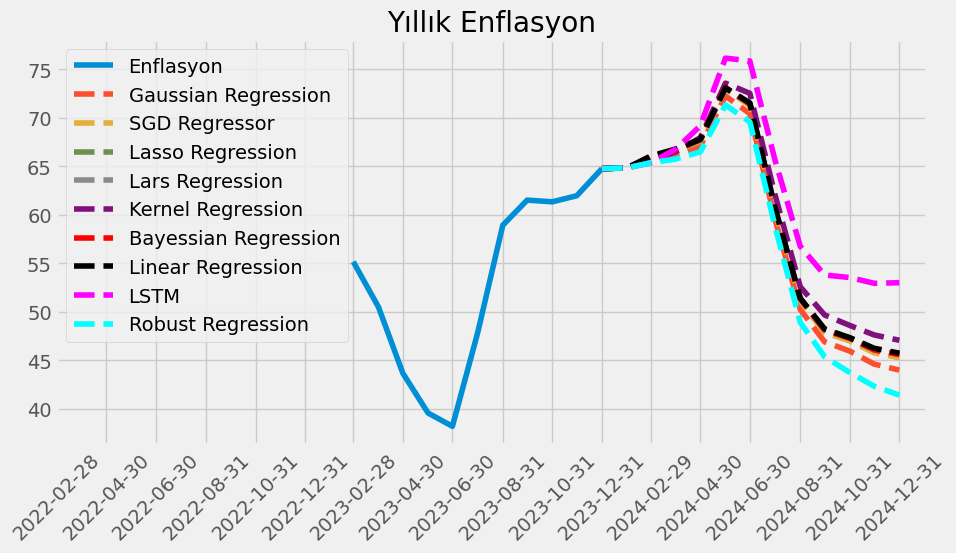

In [1370]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["SGD Regressor"]=tüfetahmin13["CPI"]
yıllıktahmin["Gaussian Regression"]=tüfetahmin12["CPI"]
yıllıktahmin["Lasso Regression"]=tüfetahmin14["CPI"]
yıllıktahmin["Lars Regression"]=tüfetahmin15["CPI"]
yıllıktahmin["Kernel Regression"]=tüfetahmin16["CPI"]
yıllıktahmin["Bayessian Regression"]=tüfetahmin17["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["LSTM"]=tüfetahmin20["CPI"]
yıllıktahmin["Robust Regression"]=tüfetahmin22["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["Gaussian Regression"].iloc[23:-2],'--',label="Gaussian Regression")
plt.plot(yıllıktahmin["SGD Regressor"].iloc[23:-2],'--',label="SGD Regressor")
plt.plot(yıllıktahmin["Lasso Regression"].iloc[23:-2],'--',label="Lasso Regression")
plt.plot(yıllıktahmin["Lars Regression"].iloc[23:-2],'--',label="Lars Regression")
plt.plot(yıllıktahmin["Kernel Regression"].iloc[23:-2],'--',label="Kernel Regression")
plt.plot(yıllıktahmin["Bayessian Regression"].iloc[23:-2],'--',label="Bayessian Regression",color="red")
plt.plot(yıllıktahmin["Linear Regression"].iloc[23:-2],'--',label="Linear Regression",color="black")
plt.plot(yıllıktahmin["LSTM"].iloc[23:-2],'--',label="LSTM",color="magenta")
plt.plot(yıllıktahmin["Robust Regression"].iloc[23:-2],'--',label="Robust Regression",color="cyan")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[1:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [1371]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,Maksimum,Minimum
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786


In [1372]:
yıllıktahmin["Ortalama"]=yıllıktahmin.iloc[:,1:-2].mean(axis=1)
yıllıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')
yıllıktahmin


,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,Maksimum,Minimum
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786


In [1373]:
sonu2023=str(yıllıktahmin.iloc[23,0])[:5]
tepe=str(yıllıktahmin.iloc[28,0])[:5]
sonu2024=str(yıllıktahmin.iloc[35,0])[:5]
max=str(yıllıktahmin.iloc[-2,-3])[:5]
min=str(yıllıktahmin.iloc[-2,-2])[:5]


In [1374]:
min1=str(yıllıktahmin.iloc[35,-1])[:2]
max1=str(yıllıktahmin.iloc[35,-2])[:2]

In [1375]:
cariay=evds.get_data(["TP.PKAUO.S01.A.U"],startdate="01-11-2022",enddate="28-02-2024")
cariay=cariay.set_index(pd.date_range(start="2022-11-30",periods=16,freq="1M"))
del cariay["Tarih"]
cariay.columns=["Cari Ay Medyan Tahmin"]
cariay["TÜFE"]=df.iloc[-14:,0].shift(1).dropna()
cariay["Cari Ay Medyan Tahmin"]=1+(cariay["Cari Ay Medyan Tahmin"]/100)
cariay.iloc[-1,1]=1984.02
cariay["Enflasyon"]=cariay["Cari Ay Medyan Tahmin"]*cariay["TÜFE"]
cariay["TÜFE Önceki"]=df.iloc[-25:,0].shift(12).dropna()
cariay.iloc[-1,3]=1241.33
cariay["Enflasyon"]=((cariay["Enflasyon"]/cariay["TÜFE Önceki"])-1)*100
cariay

,Cari Ay Medyan Tahmin,TÜFE,Enflasyon,TÜFE Önceki
2022-11-30,1.0314,NaN,NaN,NaN
2022-12-31,1.0269,NaN,NaN,NaN
2023-01-31,1.0265,1128.45,51.769968,763.23
2023-02-28,1.0301,1203.48,54.976654,799.93
2023-03-31,1.0288,1241.33,51.377401,843.64
2023-04-30,1.0265,1269.75,44.055347,904.79
2023-05-31,1.0241,1300.04,42.887757,931.76
2023-06-30,1.0281,1300.60,36.736564,977.90
2023-07-31,1.0376,1351.59,40.096679,1001.03
2023-08-31,1.0554,1479.84,53.775724,1015.65


In [1376]:
ay1sonra=evds.get_data(["TP.PKAUO.S01.B.U"],startdate="01-01-2024",enddate="31-01-2024")
ay1sonra["TÜFE"]=2059.41
ay1sonra["TÜFE Yeni"]=(1+(ay1sonra["TP_PKAUO_S01_B_U"]/100))*ay1sonra["TÜFE"]
ay1sonra["TÜFE Eski"]=df.loc["2023-03-31"]["CPI"]
ay1sonra["Enflasyon"]=((ay1sonra["TÜFE Yeni"]/ay1sonra["TÜFE Eski"])-1)*100
ay1sonra

,Tarih,TP_PKAUO_S01_B_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-1,3.51,2059.41,2131.695291,1269.75,67.883071


In [1377]:
ay2sonra=evds.get_data(["TP.BEK.S01.C.U"],startdate="01-02-2024",enddate="31-12-2024")
ay2sonra["TÜFE"]=2126.96
ay2sonra["TÜFE Yeni"]=(1+(ay2sonra["TP_BEK_S01_C_U"]/100))*ay2sonra["TÜFE"]
ay2sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay2sonra["Enflasyon"]=((ay2sonra["TÜFE Yeni"]/ay2sonra["TÜFE Eski"])-1)*100
ay2sonra

,Tarih,TP_BEK_S01_C_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-2,3.28,2126.96,2196.724288,1300.04,68.973592


In [1378]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-02-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-2,42.96


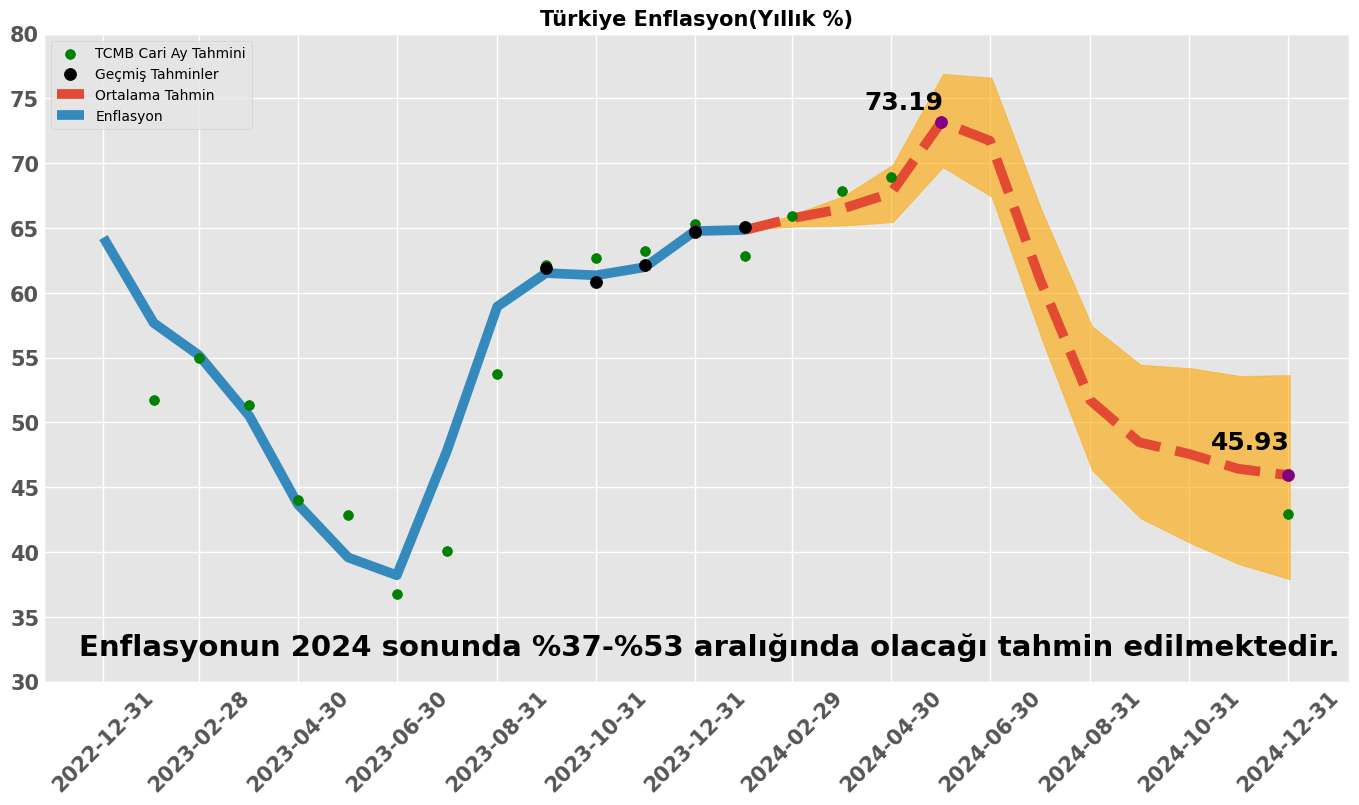

In [1379]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('ggplot')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-03-31"),y=ay1sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=pd.to_datetime("2024-04-30"),y=ay2sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=cariay[2:].index,y=cariay["Enflasyon"][2:].values,color="green",zorder=3,label='TCMB Cari Ay Tahmini',s=50)
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[20:25],y=[61.94,60.84,62.13,64.71,65.06],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[23],y=yıllıktahmin.iloc[23,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[28],y=yıllıktahmin.iloc[28,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[35],y=yıllıktahmin.iloc[35,0],color='purple',zorder=3,s=75)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
plt.plot(yıllıktahmin["Ortalama"].iloc[24:-2],'--',label="Ortalama Tahmin",linewidth=7)
plt.plot(yıllıktahmin["Ortalama"].iloc[11:25],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[24:-1].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:-1].shift(1), yıllıktahmin["Minimum"].iloc[24:-1].shift(1), alpha=0.6, color='orange')
# Tarihi ekseni birimlerine dönüştürün
annotation_date = mdates.datestr2num('2025-02')
plt.text(mdates.datestr2num('2024-06'), float(tepe)+1, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2026-01'), float(sonu2024)-5, sonu2025, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2025-12'), float(sonra24ay)+3, sonra24ay, fontsize=12, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 32, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11:37:2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01')])

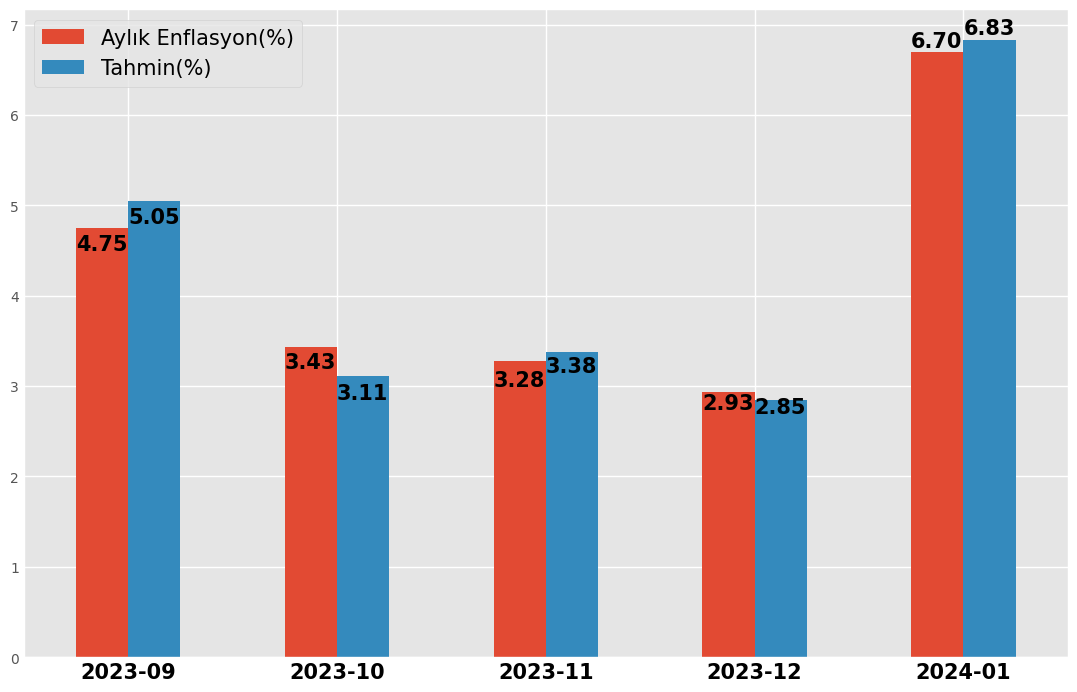

In [1380]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=5,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.25,4.5),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,4.8),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.75,3.2),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,2.85),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.75,3),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,3.15),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.75,2.75),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,2.7),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.75,6.75),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,6.90),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [1381]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


Text(10.75, 3.545728242318591, '3.73')

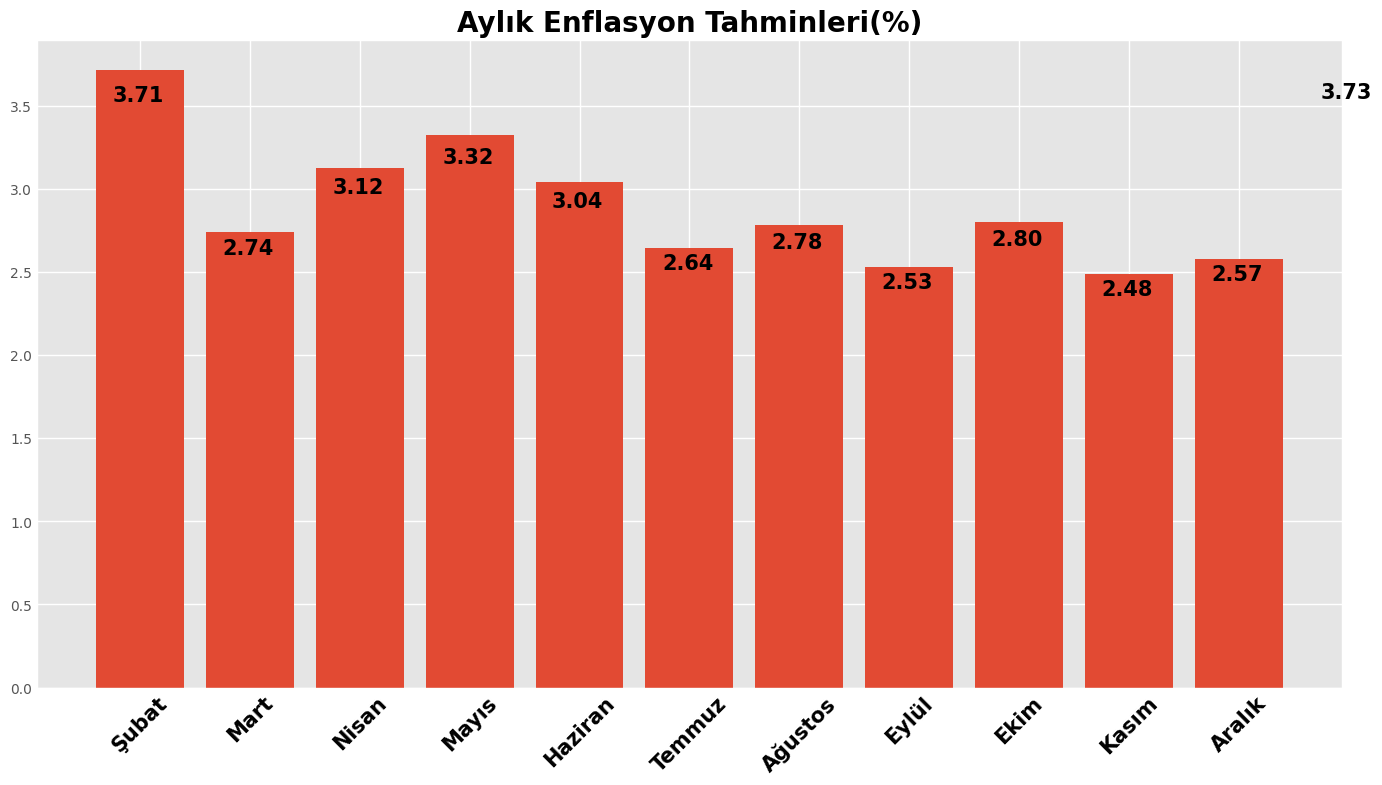

In [1382]:
plt.figure(figsize=(15,8))
plt.bar(x=["Şubat","Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-2,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-3])[:4],xy=(-0.25,aylıktahmin.iloc[0,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-3])[:4],xy=(0.75,aylıktahmin.iloc[1,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-3])[:4],xy=(1.75,aylıktahmin.iloc[2,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-3])[:4],xy=(2.75,aylıktahmin.iloc[3,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-3])[:4],xy=(3.75,aylıktahmin.iloc[4,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-3])[:4],xy=(4.75,aylıktahmin.iloc[5,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-3])[:4],xy=(5.75,aylıktahmin.iloc[6,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-3])[:4],xy=(6.75,aylıktahmin.iloc[7,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-3])[:4],xy=(7.75,aylıktahmin.iloc[8,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-3])[:4],xy=(8.75,aylıktahmin.iloc[9,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-3])[:4],xy=(9.75,aylıktahmin.iloc[10,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-3])[:4],xy=(10.75,aylıktahmin.iloc[11,-3]*0.95),fontweight="bold",fontsize=15)